#**Polycystic Ovary Syndrome (PCOS) Detection Using Machine Learning**

Team Members: Zhq. Pang, V. Olatope, X.T. Yu


# **1 Introduction**

Polycystic Ovary Syndrome (PCOS) is a common endocrine disorder among women and is characterized by hormonal imbalances, ovarian cysts, and a range of symptoms, such as irregular menstrual cycles and weight gain [1]. These factors can significantly impact the quality of life of the affected individuals. It is widespread, affecting approximately one in ten women globally (Johns Hopkins Medicine, n.d.; Maple Leaf Medical Center, 2019). Figure 1 gives a summary of some of this statistics.

In addition to these primary symptoms, PCOS is also associated with other health concerns such as infertility, high blood pressure, increased risk of type 2 diabetes, high cholesterol, sleep apnea, depression, and anxiety. Women with PCOS may also have trouble conceiving, and are at a higher risk of complications during pregnancy. The wide range of symptoms among individuals makes precise diagnosis a challenge. Early detection and diagnosis of PCOS are crucial for effective management and treatment[2].


In this project, our goal was to develop a machine learning-based approach for PCOS detection by leveraging the knowledge and techniques covered in Statistical and Machine Learning courses. By applying various machine-learning algorithms and evaluating their performance, we aimed to build an accurate and reliable model that can assist in the early identification of PCOS.



## **1.1 Aim and Objectives**

This project aimed to devise a machine learning-based approach for PCOS detection by utilizing laboratory blood test data. Our objectives revolve around five questions.

1. What insights can be gained from a comprehensive analysis of laboratory blood test data pertinent to PCOS?
2. What methodologies are employed to standardize features and encode categorical variables to ensure the integrity and quality of the underlying data?
3. Which specific features extracted from the extensive laboratory blood test dataset are pivotal indicators for detecting and characterizing PCOS?
4. How is the intricate process of model training conducted using the amalgamated data?
5. What metrics are used for evaluation and how do we compare the performances of different models to select the best approach for PCOS detection?

# **2 Methodology**

The following methodology outlines were delineated to accomplish the project's overarching goal.


**1) Preprocessing of Laboratory Blood Test Dataset**:
Preprocessing tasks include addressing missing values, feature normalization, and categorical variable encoding within the laboratory blood test dataset. This pivotal phase ensures the integrity of the data and augments the efficacy of subsequent machine learning models.

**2) Comprehensive Analysis of Laboratory Blood Test Results**:
Conduct a thorough examination of the dataset derived from laboratory blood tests to uncover intricate patterns and characteristics of germanes in PCOS. This exploratory analysis lays the foundation for feature selection, facilitating the identification of potential interrelations between specific blood test parameters and PCOS.

**3) Feature Extraction for PCOS Indicators**:
Pertinent features extracted from the laboratory blood test dataset serve as pivotal indicators of PCOS and its correlated manifestations. These extracted features play a central role in the precise classification of PCOS.

**4) Development and Training of Machine Learning Models**:
Implement and train diverse machine learning algorithms encompassing logistic regression, decision trees, random forests, LDA, QDA, K-nearest neighbors, support vector machines,  naïve-based, gradient boosting, and XGBoost, leveraging amalgamated data. This empirical exploration aims to identify the most efficacious model for discerning PCOS.

**5) Performance Evaluation and Model Comparison**:
A comprehensive assessment of the developed machine learning models utilizing appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Rigorous validation techniques, including cross-validation, were used for each model category. Ultimately, the performance of distinct models will be juxtaposed to ascertain the optimal, accurate, and dependable approach for PCOS detection.


# **3 Dataset**
The datasets used for the analyses and their properties are presented in Table 2. The site where the data were obtained is accessible to the public; hence, there was no infringement of data privacy. The dataset was accessed on July 6, 2023. It contained both continuous and categorical variables. Categorical variables were encoded as dummy numerical values. For example, a PCOS (Y/N) column value of one implies the patient has PCOS, whereas a value of zero implies that the patient does not have PCOS.

<br>
Table 2: Dataset, source, and description
<br>

| SN | Data | Source | Description |
|----------|----------|----------|----------|
| 1    | PCOS dataset   | Johns Hopkins Medicine (certified)   |541 rows and 44 columns|
<br>

The data were generally good. However, two data-quality issues were identified.

Given the variations in the magnitude of the data in the columns and the significant number of columns, standardization and dimensionality reduction algorithms were included in the process. The full meaning of the columns in the dataset is presented in the glossary section.

# **Mounting google drive, defining file path and importing necessary library**

In [1]:
# mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# path of the images file
file_path = "/content/drive/MyDrive/pcos/"

In [3]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 8.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras

from prince import FAMD, PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **4 Data Wrangling**

In [5]:
# import the PCOS laboratory test data
lab_test = pd.read_csv(file_path + "PCOS_data_Draft2.csv")

# display the dataframe to inspect the data
display(lab_test.head())

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# check missing values in variables
lab_test.isnull().sum()

Sl. No                   0
Patient File No.         0
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of abortions         0
I beta-HCG(mIU/mL)       0
II beta-HCG(mIU/mL)      0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
B

In [ ]:
display(round(lab_test.describe(),2))

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,540.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00,...,540.00,539.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00
mean,270.94,270.94,0.33,31.42,59.64,156.49,24.31,13.80,73.25,19.24,...,0.49,0.52,0.25,114.65,76.94,6.13,6.64,15.01,15.45,8.48
std,156.46,156.46,0.47,5.41,11.04,6.04,4.06,1.84,4.43,1.69,...,0.50,0.50,0.43,7.39,5.57,4.23,4.44,3.57,3.32,2.16
min,1.00,1.00,0.00,20.00,31.00,137.00,12.40,11.00,13.00,16.00,...,0.00,0.00,0.00,12.00,8.00,0.00,0.00,0.00,0.00,0.00
25%,135.75,135.75,0.00,27.75,52.00,152.00,21.60,13.00,72.00,18.00,...,0.00,0.00,0.00,110.00,70.00,3.00,3.00,13.00,13.00,7.00
50%,270.50,270.50,0.00,31.00,59.30,156.00,24.20,14.00,72.00,18.00,...,0.00,1.00,0.00,110.00,80.00,5.00,6.00,15.00,16.00,8.50
75%,406.25,406.25,1.00,35.00,65.00,160.00,26.62,15.00,74.00,20.00,...,1.00,1.00,0.00,120.00,80.00,9.00,10.00,18.00,18.00,9.80
max,541.00,541.00,1.00,48.00,108.00,180.00,38.90,18.00,82.00,28.00,...,1.00,1.00,1.00,140.00,100.00,22.00,20.00,24.00,24.00,18.00


In [6]:
# Exclude rows with null values
null_rows = lab_test.isnull().any(axis=1)
lab_test_null = lab_test[~null_rows]

lab_test_null.isnull().sum()

lab_test_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 539
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 538 non-null    int64  
 1   Patient File No.       538 non-null    int64  
 2   PCOS (Y/N)             538 non-null    int64  
 3   Age (yrs)              538 non-null    int64  
 4   Weight (Kg)            538 non-null    float64
 5   Height(Cm)             538 non-null    float64
 6   BMI                    538 non-null    float64
 7   Blood Group            538 non-null    int64  
 8   Pulse rate(bpm)        538 non-null    int64  
 9   RR (breaths/min)       538 non-null    int64  
 10  Hb(g/dl)               538 non-null    float64
 11  Cycle(R/I)             538 non-null    int64  
 12  Cycle length(days)     538 non-null    int64  
 13  Marraige Status (Yrs)  538 non-null    float64
 14  Pregnant(Y/N)          538 non-null    int64  
 15  No. of

In [7]:
mixed_data_type_columns = lab_test_null.select_dtypes(include=['object']).applymap(type).nunique() > 1

mixed_columns = mixed_data_type_columns[mixed_data_type_columns].index.tolist()
print("Columns with mixed data types:")
print(mixed_columns) # revert to the original file

Columns with mixed data types:
[]


There are two rows with incomplete data in the "Marraige Status (Yrs)" and " fast food (Y/N)". The number of rows with incomplete data was small. They were excluded from the dataset, thereby reducing the number of rows from 540 to 538.
<br>

In addition, we attempted to check if there were columns with multiple data types. The results show that there are no mixed data types.

# **5 Exploratory Data Analysis**

## **5.1 Continuous Variables**

In [8]:
# Separate the variables into continous and categorical variables

cols_continous = ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle(R/I)", "Cycle length(days)", \
                  "Marraige Status (Yrs)", "No. of abortions", "I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)", "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH",	"Hip(inch)", "Waist(inch)", \
                  "Waist:Hip Ratio", "TSH (mIU/L)", "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", \
                  "Follicle No. (L)", "Follicle No. (R)", "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"]

cols_categorical = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"]

In [9]:
lab_test_continous = lab_test_null[cols_continous]
display(lab_test_continous.head(5))

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,17.1,0.57,92.0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,61.3,0.97,92.0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,49.7,0.36,84.0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,33.4,0.36,76.0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,43.8,0.38,84.0,120,80,3,4,16.0,14.0,7.0


### **5.1.1 Histogram Plot to show distribution between variables**

33it [00:30,  1.09it/s]


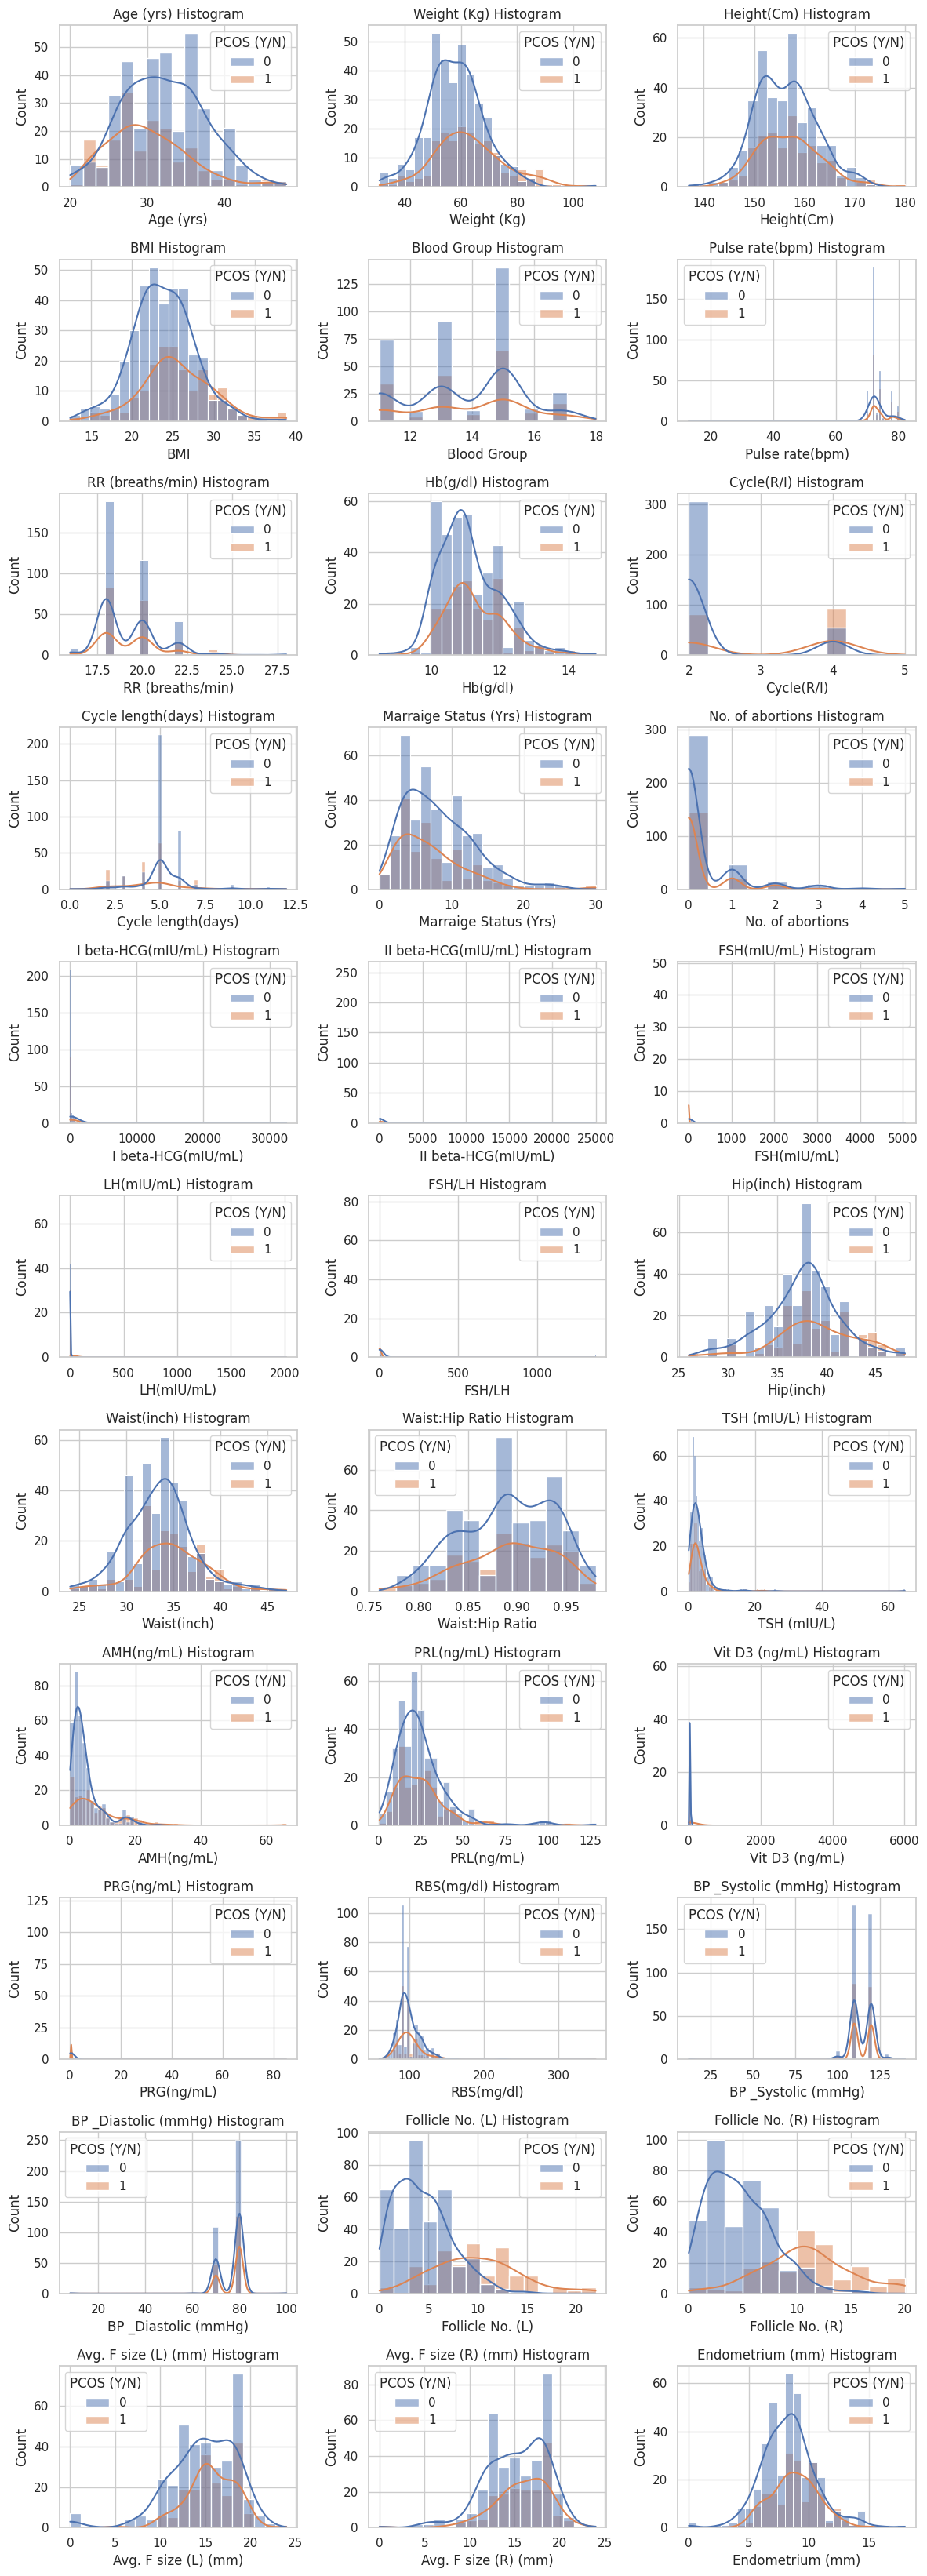

In [10]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Get the numerical columns (excluding 'PCOS (Y/N)')
numerical_columns = lab_test_continous.select_dtypes(include='number').columns.drop('PCOS (Y/N)')

# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_columns) + 2) // 3  # Rounding up to the nearest integer
num_cols = 3

# Define smaller subplot size
subplot_width = 4
subplot_height = 3

# Calculate the overall figsize based on the number of rows and columns
fig_width = num_cols * subplot_width
fig_height = num_rows * subplot_height

# Create a subplot with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in tqdm(enumerate(numerical_columns)):
    sns.histplot(data=lab_test_continous, x=col, hue="PCOS (Y/N)", kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Histogram")

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **5.1.2 Box Plot to show distribution between variables**

Several noteworthy observations have surfaced upon generating histogram plots to visually represent the distribution of continuous variables, utilizing PCOS (Y/N) as the distinguishing hue (blue for negative and orange for positive).

- Variables with Overlapping Distributions: A substantial number of variables, including weight, height, BMI, pulse rate, Hb, marital status, no. of Abortions, Waist circumference, TSH, and BP exhibited overlapping distributions between the groups with and without PCOS. This indicates the limited ability of these variables to effectively differentiate individuals based on their PCOS status.

- Variables with Clear Separation: Conversely, variables such as cycle, follicle no. (L), and Follicle No. (R) displays distinct separation patterns within their distributions. This distinct separation suggests the potential importance of these variables in the differentiation of individuals with and without PCOS.

Implications for Classification Models: The Histogram analysis underscores the significance of variables that present pronounced distributional disparities. These variables provide key insights that could significantly contribute to the development of robust classification models, with the primary goal of accurately distinguishing individuals based on their PCOS status.

In summary, the histogram plots provided valuable insights into the distributional characteristics of continuous variables in relation to PCOS classification. Variables exhibiting prominent distributional differences may serve as pivotal attributes when constructing classification models to effectively discern individuals with and without PCOS.

33it [00:00, 77.64it/s]


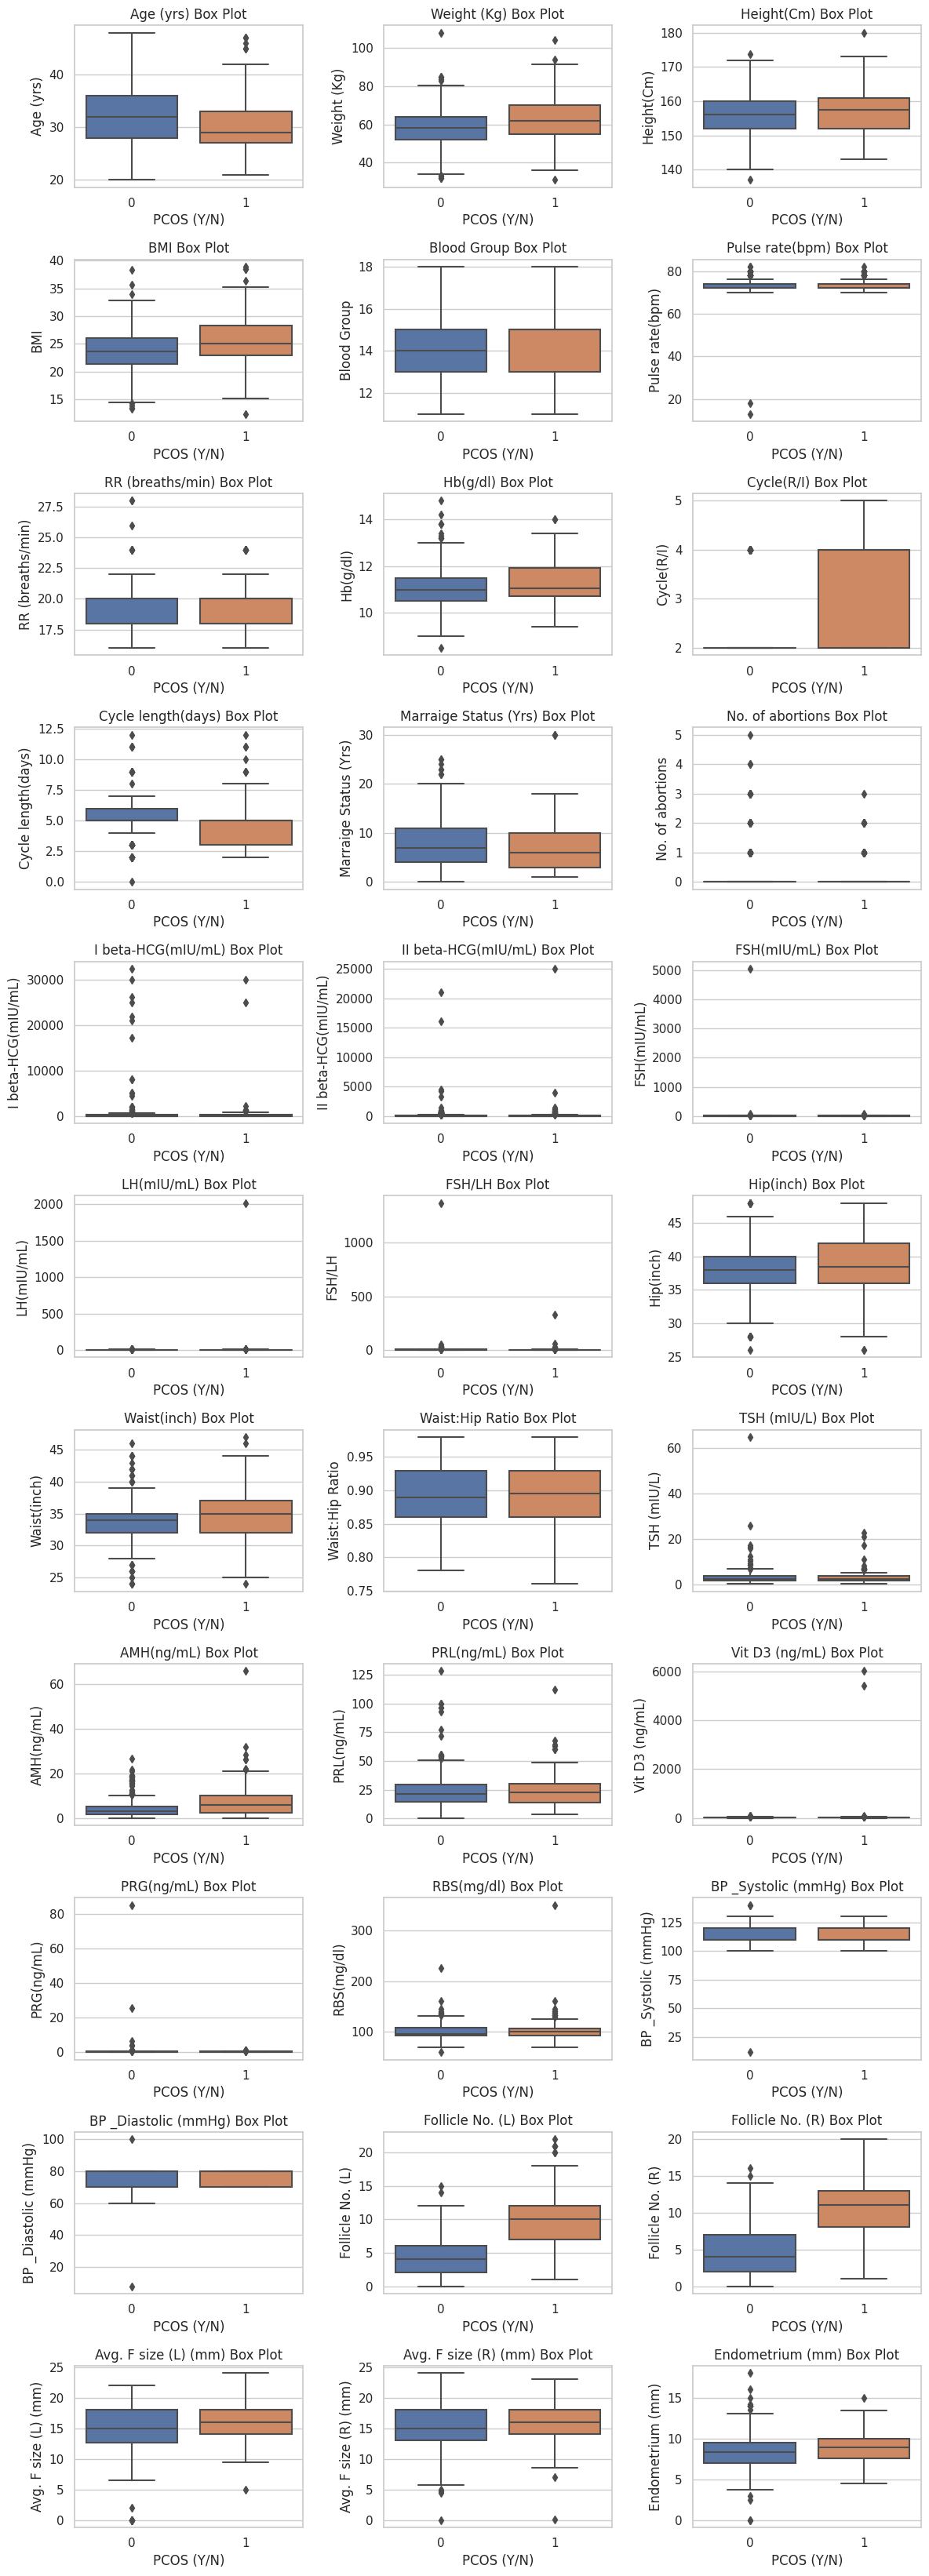

In [11]:
# Get the numerical columns (excluding 'PCOS (Y/N)')
numerical_columns = lab_test_continous.select_dtypes(include='number').columns.drop('PCOS (Y/N)')

# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_columns) + 2) // 3  # Rounding up to the nearest integer
num_cols = 3

# Define smaller subplot size
subplot_width = 4
subplot_height = 3

# Calculate the overall figsize based on the number of rows and columns
fig_width = num_cols * subplot_width
fig_height = num_rows * subplot_height

# Create a subplot with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Plot box plots for each numerical column
for i, col in tqdm(enumerate(numerical_columns)):
    sns.boxplot(data=lab_test_continous, x="PCOS (Y/N)", y=col, ax=axes[i])
    axes[i].set_title(f"{col} Box Plot")

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The exploration of distributional characteristics using box plots has provided nuanced insights into the relevance of continuous variables within the context of PCOS classification.

- Variables with Similar Medians: In parallel with the histogram findings, certain variables, including Weight, Height, and BMI, continued to show similar medians between the group with PCOS and the group without PCOS in box plots. This observation underscores the notion that these variables may possess limited discriminatory power to effectively distinguish individuals based on their PCOS status.

- Variables with Evident Median Disparities: Mirroring histogram observations, variables such as Cycle, Follicle No. (L), and Follicle No. (R) Distinct differences in medians between the two groups in box plots. The evident separation in medians underscores the potential significance of these variables in contributing to the differentiation between individuals with and without PCOS.

- Implications for Classification Models: Building upon the histogram and box plot analyses, variables with substantial median disparities, particularly those exhibiting clear separation, play a crucial role in constructing effective classification models. The information encapsulated by these variables could be instrumental in refining the accuracy of classification models tailored for robust PCOS identification.

In summary, box plots provide a comprehensive view of the distributional characteristics of continuous variables pertinent to PCOS classification. Variables that display notable median differences have emerged as pivotal components for the development of precise classification models aimed at accurately discerning individuals with and without PCOS.

## **5.2 Categorical Variables**

In [12]:
lab_test_cat = lab_test_null[cols_categorical]
display(lab_test_cat.head(5))

,PCOS (Y/N),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,0,0,0,0,0,0,0,1.0,0
1,0,1,0,0,0,0,0,0.0,0
2,1,1,0,0,0,1,1,1.0,0
3,0,0,0,0,0,0,0,0.0,0
4,0,1,0,0,0,1,0,0.0,0


8it [00:00, 61.06it/s]


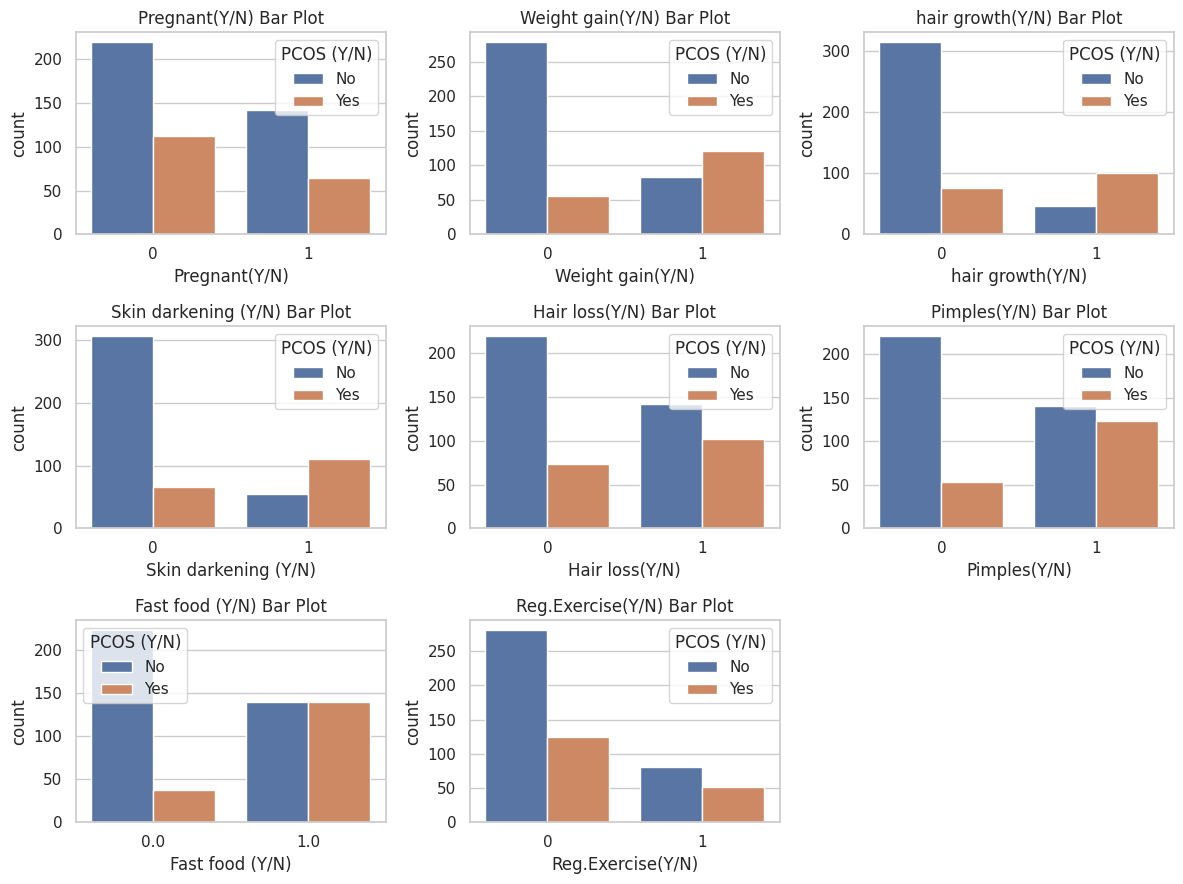

In [13]:
# Get the categorical columns (excluding 'PCOS (Y/N)')
categorical_columns = lab_test_cat.select_dtypes(include='number').columns.drop('PCOS (Y/N)')

# Calculate the number of rows and columns for the subplots
num_rows = (len(categorical_columns) + 2) // 3  # Rounding up to the nearest integer
num_cols = 3

# Define smaller subplot size
subplot_width = 4
subplot_height = 3

# Calculate the overall figsize based on the number of rows and columns
fig_width = num_cols * subplot_width
fig_height = num_rows * subplot_height

# Create a subplot with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Plot bar plots for each categorical column
for i, col in tqdm(enumerate(categorical_columns)):
    sns.countplot(data=lab_test_cat, x=col, hue="PCOS (Y/N)", ax=axes[i])
    axes[i].set_title(f"{col} Bar Plot")
    axes[i].legend(title="PCOS (Y/N)", labels=["No", "Yes"])

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

From the histogram illustrating the distribution of variables across different groups based on the presence or absence of Polycystic Ovary Syndrome (PCOS) as indicated by the hue, several conclusions can be drawn:

**Distinctive Variable Frequencies:** Notably, all variables depicted in the histogram exhibit varying frequencies across different groups. This variation underscores the potential significance of these variables in distinguishing individuals with and without PCOS.

**Selection for Model Building:** The visualization of variable distribution plays a pivotal role in selecting appropriate features for constructing accurate PCOS detection models. Variables demonstrating substantial differences in frequency are likely to meaningfully contribute to the development of effective diagnostic algorithms.

## **5.3 Addressing Multicollinearity: Using heatmaps and computing Variance Inflation Factors (VIF) for Continuous and Categorical Variables**

#### **Heatmap Continuous Variables**

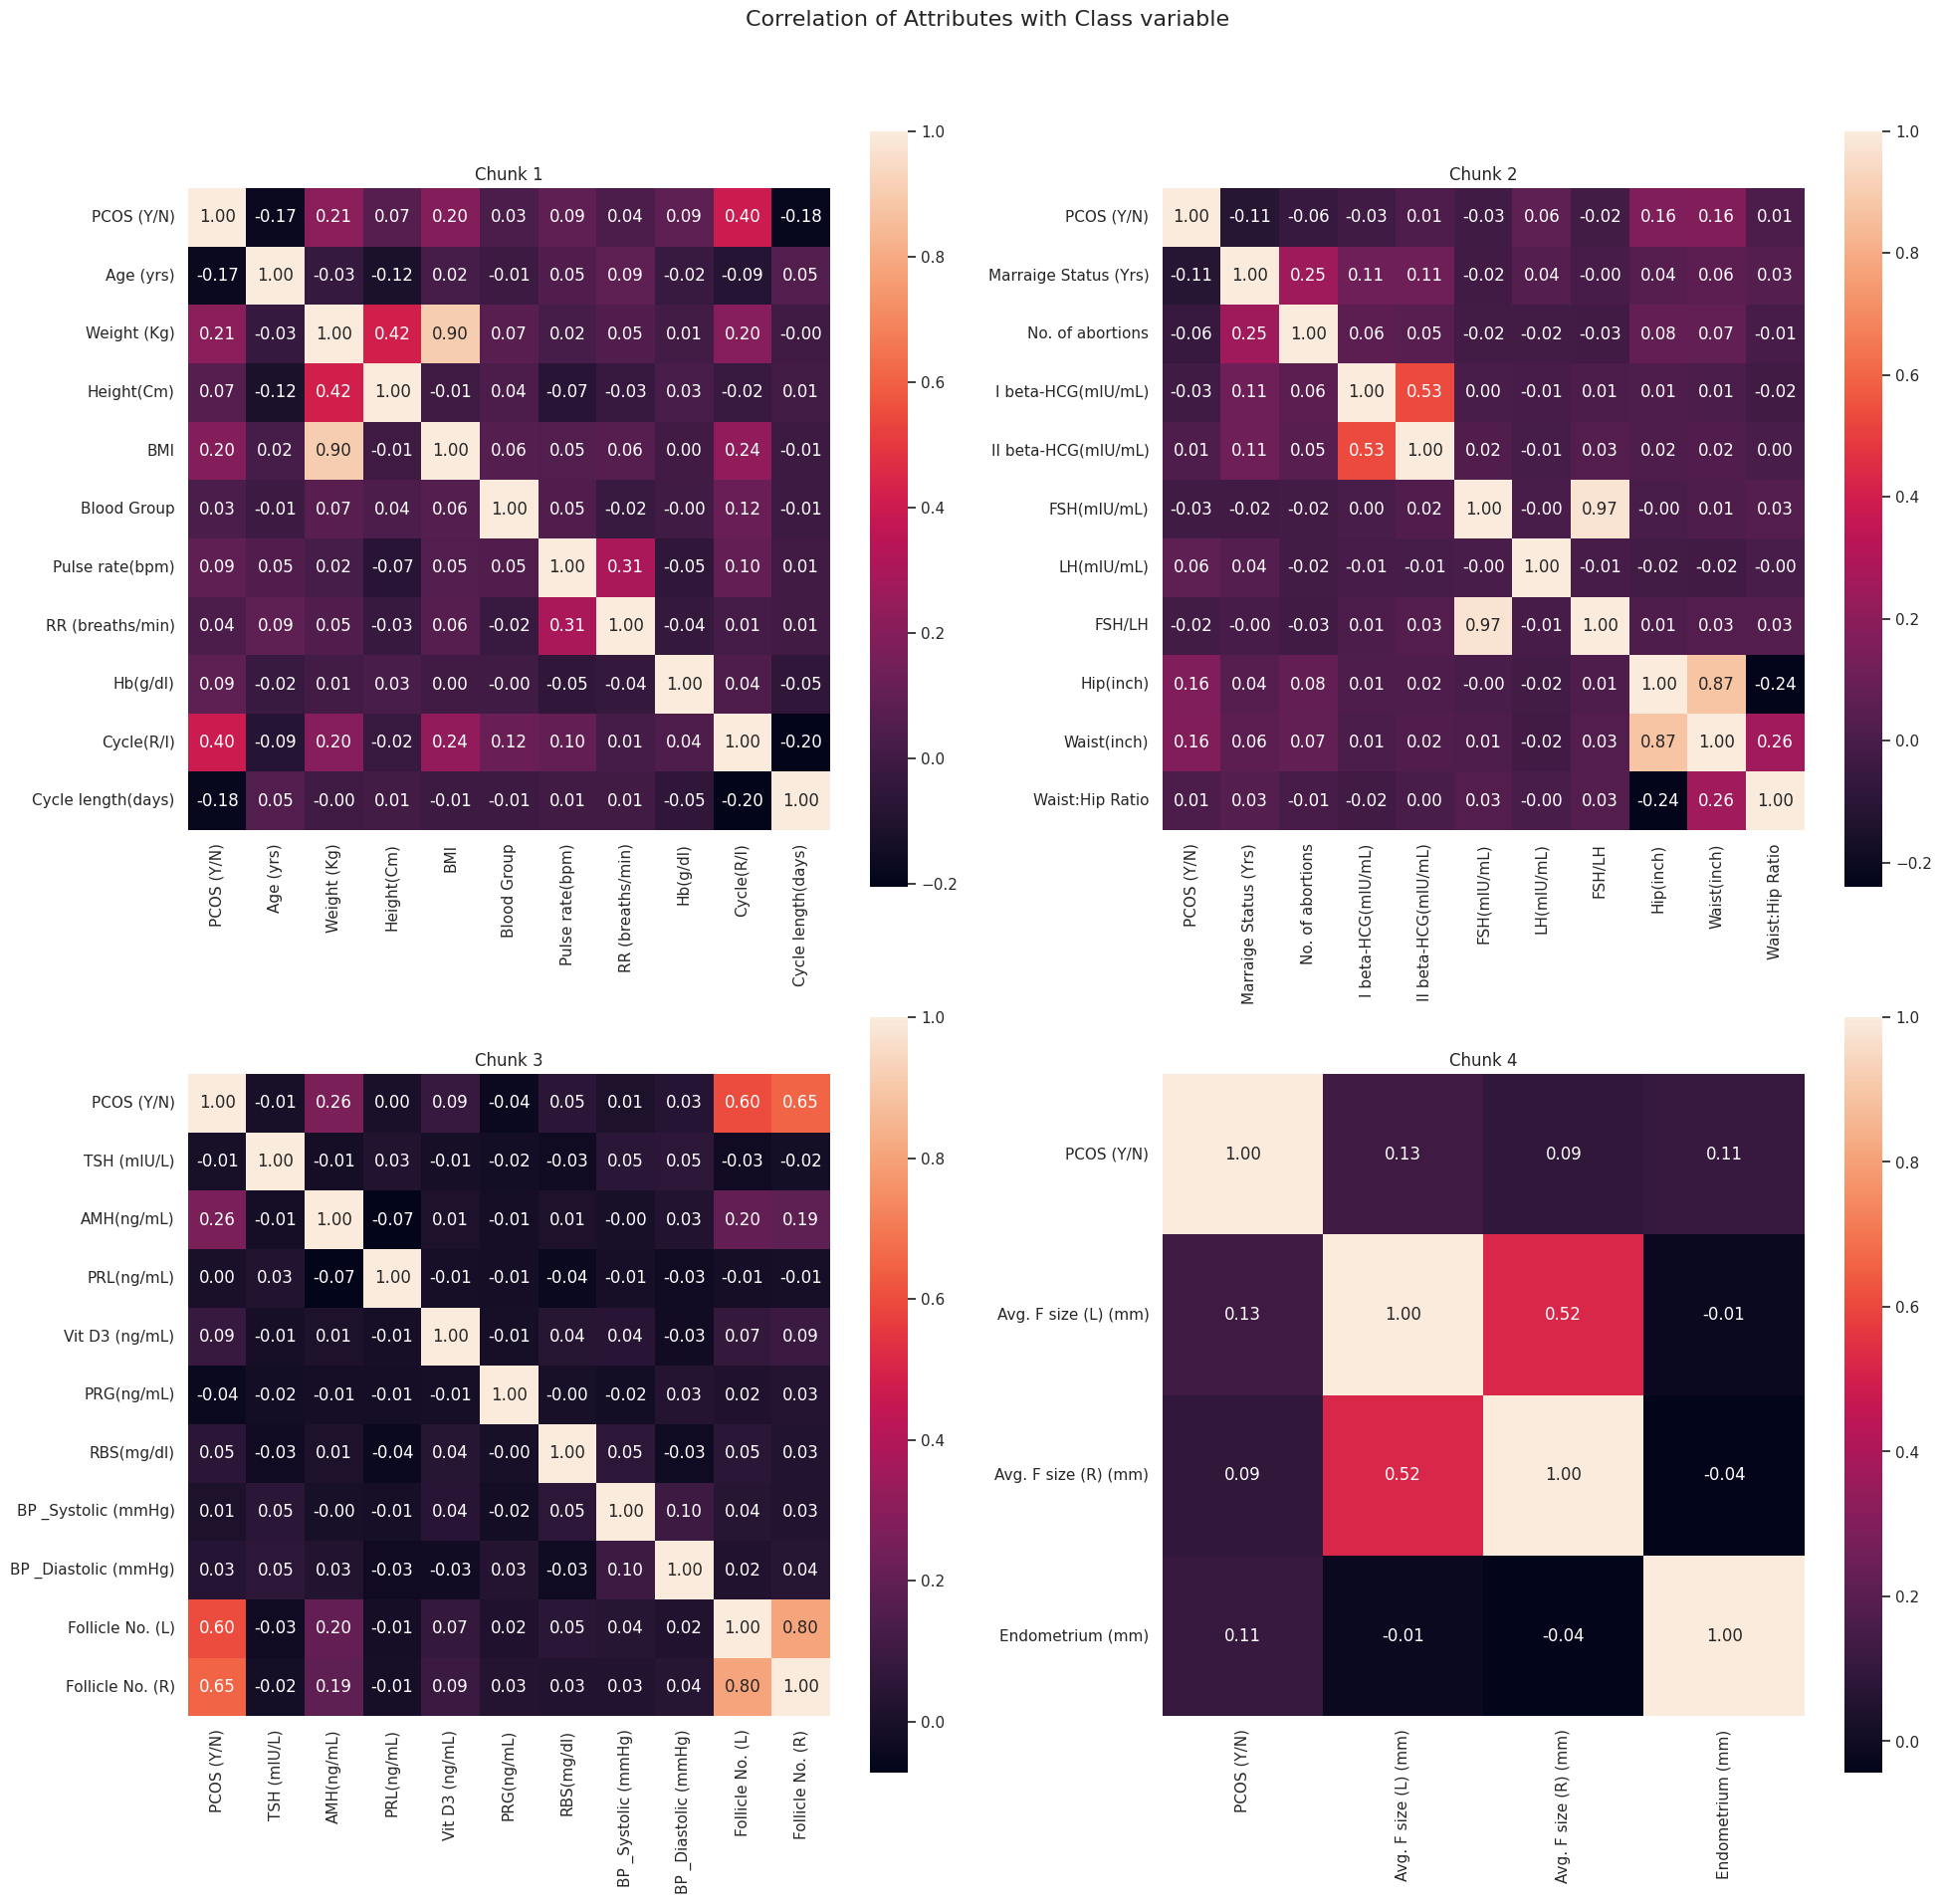

In [ ]:
# Splitting the continuous attributes into chunks of 10 (excluding the first column 'Class')
chunk_size = 10
num_chunks = (len(lab_test_continous.columns) - 1) // chunk_size + 1
continuous_cols = lab_test_continous.columns[1:]

# Calculate the number of rows and columns needed for the subplots
num_rows = (num_chunks + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10*num_rows))
fig.suptitle('Correlation of Attributes with Class variable', fontsize=16)

for i in range(num_chunks):
    row_idx = i // num_cols
    col_idx = i % num_cols
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(continuous_cols))
    cols_to_plot = ["PCOS (Y/N)"] + list(continuous_cols[start_idx:end_idx])
    data_subset = lab_test_continous[cols_to_plot]

    ax = axes[row_idx, col_idx]
    sns.heatmap(data_subset.corr(), ax=ax, square=True, annot=True, fmt='.2f', linecolor='white')
    ax.set_title(f'Chunk {i+1}')

# Remove any empty subplots
if num_chunks < num_rows * num_cols:
    for i in range(num_chunks, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add some space at the top for the main title
plt.show()

#### **Heatmap Categorical Variables**

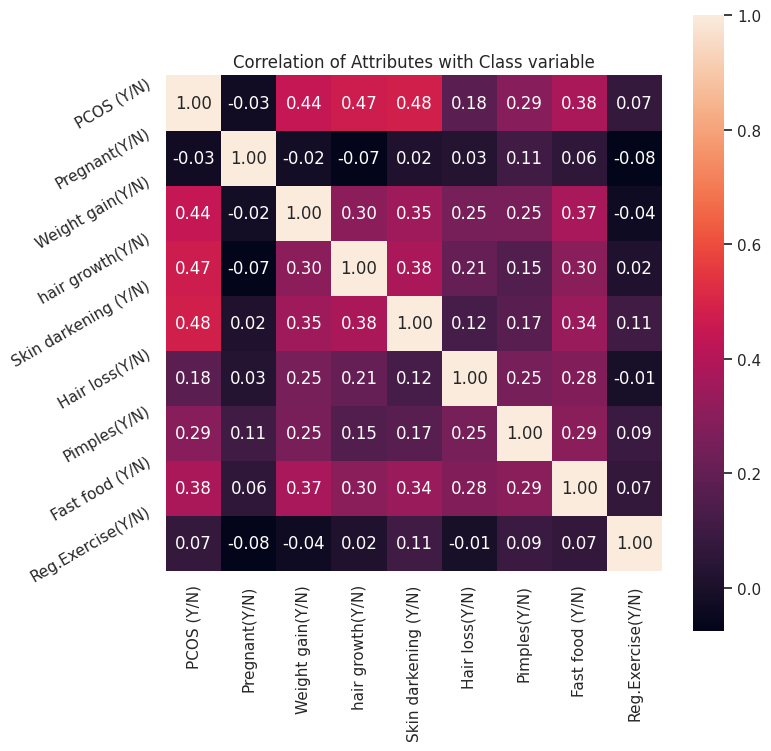

In [ ]:
# Correlation panel

plt.figure(figsize=(8,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(lab_test_cat.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

The correlation analysis conducted through the heatmap reinforced and enriched our understanding of the dataset's attributes in relation to the class variable.

**The heatmap validates initial findings:** The heatmap substantiates the trends observed in the histogram and box plot analyses. This alignment lends increased credibility to our earlier observations regarding the associations between the attributes and class variables.

Here, ** Identify significant attributes:** Notably, the correlation coefficient exceeding 0.5 for Follicle No. (L) and (R) underscore their importance. This suggests that these attributes could serve as vital contributors to classification models tailored for PCOS prediction.

**Relevance of certain attributes:** Attributes such as weight gain, hair growth, skin darkening, and fast-food consumption exhibit notably higher correlation coefficients compared to other variables. This heightened correlation highlights their potential relevance in the context of the classification model, implying their potential value in accurately distinguishing between individuals with and without PCOS.

**Multicollinearity Indication:** The exceedingly high correlation of 0.87 between Waist and Hip suggests the presence of multicollinearity, signifying a potential challenge for model stability and interpretability.

In conclusion, the correlation analysis facilitated by the heatmap augments and substantiates the preliminary findings. This comprehensive exploration offers deeper insights into attribute associations.

#### **Evaluating VIF For Continuous Variables**

In [14]:
# Calculate VIF
cols_continuous = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
                   'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
                   'Cycle length(days)', 'Marraige Status (Yrs)',
                   'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)',
                   'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
                   'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                   'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
                   'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
                   'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
# Calculate VIF
vif_data = lab_test_continous[cols_continuous]
vif = pd.DataFrame()
vif['Variable'] = cols_continuous
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

                 Variable           VIF
0               Age (yrs)     68.792836
1             Weight (Kg)   3544.394977
2              Height(Cm)  14188.892710
3                     BMI   3562.071414
4         Pulse rate(bpm)    307.466785
5        RR (breaths/min)    153.508297
6                Hb(g/dl)    178.530712
7      Cycle length(days)     12.955416
8   Marraige Status (Yrs)      6.965682
9        No. of abortions      1.346056
10     I beta-HCG(mIU/mL)      1.514741
11    II beta-HCG(mIU/mL)      1.470500
12            FSH(mIU/mL)     19.476980
13             LH(mIU/mL)      1.028123
14                 FSH/LH     19.613109
15              Hip(inch)  13762.886450
16            Waist(inch)  13563.350691
17        Waist:Hip Ratio  14187.116174
18            TSH (mIU/L)      1.712904
19             AMH(ng/mL)      2.175121
20             PRL(ng/mL)      3.836867
21         Vit D3 (ng/mL)      1.047127
22             PRG(ng/mL)      1.064294
23             RBS(mg/dl)     31.970614


In conclusion, the Variance Inflation Factor (VIF) serves as a crucial metric for assessing the impact of multicollinearity on regression analysis. A VIF value exceeding 5 typically signifies a potential issue of multicollinearity.

Upon analysis, variables with elevated VIF values, such as Height (Cm), Hip (inch), Waist (inch), and Waist-to-Hip Ratio, display significant multicollinearity, indicating strong correlations with other variables. Similarly, variables with moderate VIF values like Weight (Kg), BMI, Pulse Rate (bpm), RR (breaths/min), Hb (g/dl), FSH (mIU/mL), FSH/LH, RBS (mg/dl), BP _Systolic (mmHg), and BP _Diastolic (mmHg) may also exhibit some degree of multicollinearity.

On the other hand, variables featuring lower VIF values, such as Cycle Length (days), marital status (Yrs), and No. Abbreviations: beta-hCG (mIU/mL), beta-HCG (mIU/mL), LH (mIU/mL), TSH (mIU/L), AMH (ng/mL), PRL (ng/mL), vitamin D3 (ng/mL), PRG (ng/mL), Follicle No. (L) Follicle No. (R), Avg. F Size (L) (mm), Avg. F Size (R) (mm), and Endometrium (mm), demonstrate reduced susceptibility to multicollinearity.

High VIF values reflect substantial inter-variable correlations, potentially leading to unstable regression coefficient estimates. We understand that, in reality, some of the variables are functions of the other. For example, weight and body mass index (BMI). In the next steps, lasso regularization was performed to ratify the columns to drop.

#### **Dimension Reduction: Lasso Regularization**

In [15]:
df_lab_test = lab_test_null.copy() # make a copy of the original dataset

X_full = df_lab_test.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis = 1)
y_full = df_lab_test['PCOS (Y/N)']

# Split dataset into test and training data
lab_train_data, lab_test_data = train_test_split(df_lab_test, test_size=0.2, random_state=42)

In [16]:
# list of continuous variables and categorical varible columns
ml_cols_cont = cols_continous[1 : ]
ml_cols_cat = cols_categorical[1 : ]

In [17]:
X_train = lab_train_data.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis = 1)
y_train = lab_train_data['PCOS (Y/N)']

X_test = lab_test_data.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis = 1)
y_test = lab_test_data['PCOS (Y/N)']

In [ ]:
display(X_train.head())
display(X_test.head())

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
387,31,55.5,151.00,24.3,15,74,18,11.1,2,5,...,1,1.0,1,110,80,6,7,18.0,12.0,9.0
232,35,55.0,162.00,21.0,13,72,18,12.4,4,4,...,1,1.0,0,120,80,16,14,15.0,18.0,11.5
350,36,54.0,148.00,24.7,13,78,24,10.2,4,2,...,1,1.0,0,100,80,10,7,13.0,15.0,9.0
449,34,69.0,167.64,24.6,15,80,20,11.5,2,5,...,1,1.0,0,110,80,20,16,18.0,14.0,7.0
303,25,57.0,148.00,26.0,15,72,20,10.0,2,5,...,1,0.0,0,110,80,10,12,15.0,14.0,9.0


,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
487,36,76.9,165.0,28.2,11,72,18,10.8,2,5,...,0,1.0,0,110,80,5,9,20.0,19.0,6.8
73,26,70.0,163.0,26.3,15,72,18,10.5,2,5,...,0,0.0,0,110,80,3,4,10.5,6.0,9.8
349,22,56.0,154.0,23.6,13,72,18,10.8,2,6,...,1,1.0,0,110,80,10,6,15.0,12.0,9.0
86,31,64.0,156.0,26.3,15,74,18,12.1,4,9,...,0,0.0,0,120,80,8,10,15.0,13.0,10.0
458,36,55.0,154.0,23.2,13,74,18,10.0,2,5,...,0,1.0,0,110,80,4,1,22.0,14.0,10.5


#### **Standardization of Continuous Independent Variables**

In [18]:
scaler = StandardScaler().fit(X_train[ml_cols_cont])

X_train[ml_cols_cont] = scaler.transform(X_train[ml_cols_cont])
X_test[ml_cols_cont] = scaler.transform(X_test[ml_cols_cont])

display(X_train.head())
display(X_test.head())

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
387,-0.068604,-0.360622,-0.909090,0.008532,0.638443,0.192104,-0.739760,-0.091962,-0.624885,0.033244,...,1,1.0,1,-0.597182,0.527603,-0.073374,0.049420,0.841399,-1.144075,0.249641
232,0.682978,-0.405789,0.932733,-0.798602,-0.450964,-0.322567,-0.739760,1.447168,1.586643,-0.647472,...,1,1.0,0,0.691916,0.527603,2.281179,1.631926,-0.033081,0.764320,1.455339
350,0.870874,-0.496124,-1.411405,0.106366,-0.450964,1.221444,2.762221,-1.157514,1.586643,-2.008905,...,1,1.0,0,-1.886281,0.527603,0.868447,0.049420,-0.616068,-0.189878,0.249641
449,0.495083,0.858889,1.877086,0.081908,0.638443,1.736115,0.427567,0.381616,-0.624885,0.033244,...,1,1.0,0,-0.597182,0.527603,3.223000,2.084070,0.841399,-0.507944,-0.714917
303,-1.195977,-0.225121,-1.411405,0.424328,0.638443,-0.322567,0.427567,-1.394304,-0.624885,0.033244,...,1,0.0,0,-0.597182,0.527603,0.868447,1.179781,-0.033081,-0.507944,0.249641


,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
487,0.870874,1.572529,1.435049,0.962417,-1.540371,-0.322567,-0.73976,-0.447146,-0.624885,0.033244,...,0,1.0,0,-0.597182,0.527603,-0.308830,0.501565,1.424386,1.082385,-0.811373
73,-1.008081,0.949223,1.100172,0.497704,0.638443,-0.322567,-0.73976,-0.802330,-0.624885,0.033244,...,0,0.0,0,-0.597182,0.527603,-0.779740,-0.628796,-1.344802,-3.052470,0.635465
349,-1.759663,-0.315455,-0.406774,-0.162678,-0.450964,-0.322567,-0.73976,-0.447146,-0.624885,0.713961,...,1,1.0,0,-0.597182,0.527603,0.868447,-0.176652,-0.033081,-1.144075,0.249641
86,-0.068604,0.407218,-0.071897,0.497704,0.638443,0.192104,-0.73976,1.091984,1.586643,2.756110,...,0,0.0,0,0.691916,0.527603,0.397536,0.727637,-0.033081,-0.826009,0.731920
458,0.870874,-0.405789,-0.406774,-0.260512,-0.450964,0.192104,-0.73976,-1.394304,-0.624885,0.033244,...,0,1.0,0,-0.597182,0.527603,-0.544285,-1.307013,2.007373,-0.507944,0.973060


In [19]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -2.74


In [20]:
# Lasso with 10 fold cross-validation
lasso_model = LassoCV(cv=10, random_state=2, max_iter=10000)
# Fit model
lasso_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=2)

In [21]:
lasso_model.alpha_

0.009828207053980716

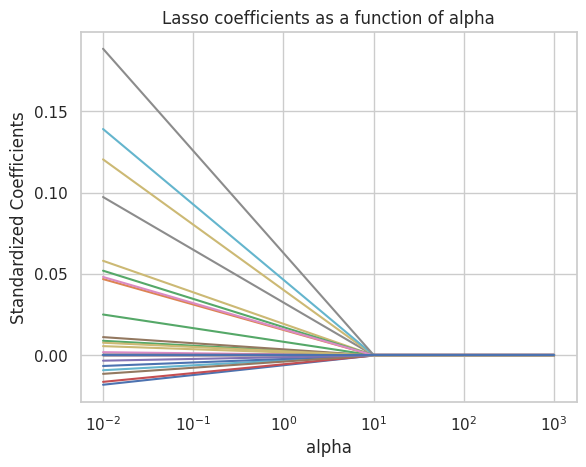

In [22]:
alphas = np.linspace(0.01,1000,100)
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

plt.show();

In [23]:
# Set best alpha
lasso_best = Lasso(alpha=lasso_model.alpha_)
lasso_best.fit(X_train, y_train)

print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 66.32
R squared test set 41.4


In [24]:
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=2, max_iter=10000)

# Fit model
model.fit(X_train, y_train)
LassoCV(cv=10, max_iter=10000, random_state=0)
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
print(list(zip(lasso_best.coef_, X_full)))
mse_test=mean_squared_error(y_test, lasso_best.predict(X_test))
print(mse_test)

# Get the coefficients of the Lasso model
coefficients = model.coef_
# Identify relevant features with non-zero coefficients
relevant_features = X_full.columns[coefficients != 0]
print(relevant_features)
print(len(relevant_features))

[(-0.018016444654456554, 'Age (yrs)'), (0.0, 'Weight (Kg)'), (0.00911036088949777, 'Height(Cm)'), (0.0, 'BMI'), (0.0, 'Blood Group'), (0.011433364750193964, 'Pulse rate(bpm)'), (0.0, 'RR (breaths/min)'), (0.0, 'Hb(g/dl)'), (0.05812200920516077, 'Cycle(R/I)'), (-0.009172468716373278, 'Cycle length(days)'), (-0.006552912045259435, 'Marraige Status (Yrs)'), (-0.0, 'Pregnant(Y/N)'), (-0.0, 'No. of abortions'), (-0.01639668041421601, 'I beta-HCG(mIU/mL)'), (0.0, 'II beta-HCG(mIU/mL)'), (-0.0, 'FSH(mIU/mL)'), (0.0021191372492933, 'LH(mIU/mL)'), (-0.0, 'FSH/LH'), (0.005864660588085148, 'Hip(inch)'), (0.0, 'Waist(inch)'), (-0.0, 'Waist:Hip Ratio'), (0.0, 'TSH (mIU/L)'), (0.02519474070628101, 'AMH(ng/mL)'), (0.0, 'PRL(ng/mL)'), (-0.0, 'Vit D3 (ng/mL)'), (-0.011441263951419004, 'PRG(ng/mL)'), (0.0, 'RBS(mg/dl)'), (0.09748112645089176, 'Weight gain(Y/N)'), (0.1209211676962362, 'hair growth(Y/N)'), (0.139497899448691, 'Skin darkening (Y/N)'), (0.0, 'Hair loss(Y/N)'), (0.047456930202953884, 'Pimple

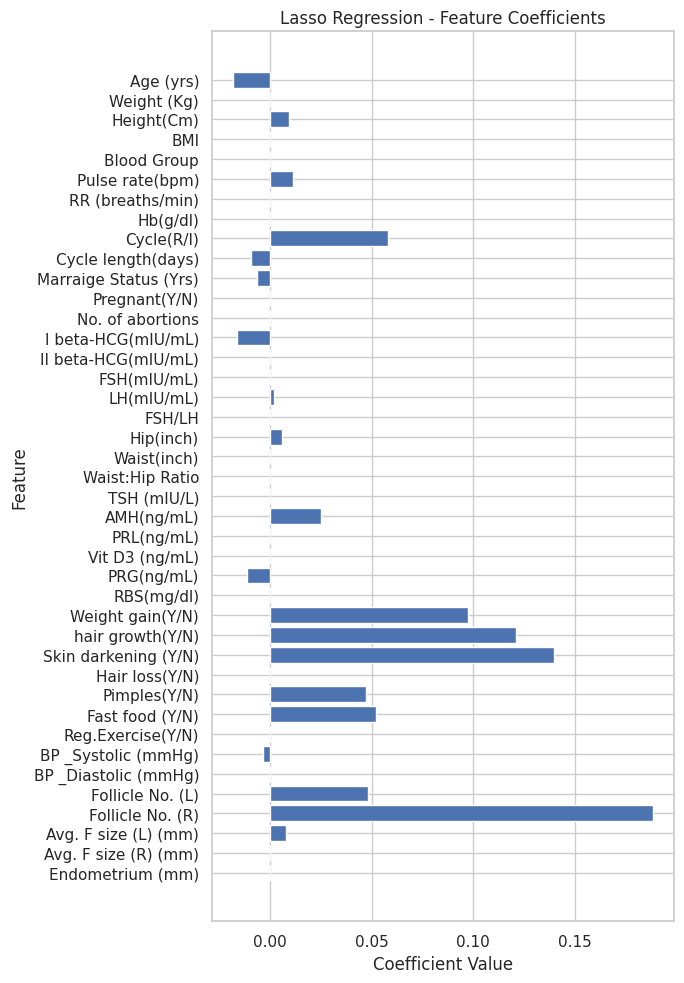

In [ ]:
# Get the coefficients of the Lasso model
coefficients = lasso_best.coef_

# Create a horizontal bar plot for coefficients and variable names
plt.figure(figsize=(7, 10))
plt.barh(X_full.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression - Feature Coefficients')
plt.tight_layout()  # Adjust layout for better visualization
plt.gca().invert_yaxis()  # Invert y-axis for top-down display
plt.show()

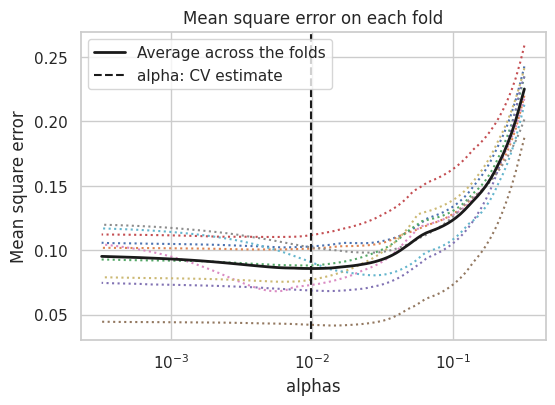

In [ ]:
plt.rcParams['figure.figsize']=(6,4)
plt.semilogx(lasso_model.alphas_, lasso_model.mse_path_, ":")
plt.plot(
    lasso_model.alphas_ ,
    lasso_model.mse_path_.mean(axis=-1), "k", label="Average across the folds", linewidth=2,
)
plt.axvline(
    lasso_model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")
plt.show();

In this section, we carry out a lasso regression. It is a regularization technique used for feature selection and variable shrinkage in regression models. First, we implemented that algorithm on the training and test set with an inital value of alpha. The R-square obtained we 0 and -2.7 respectively. This indicates that the model performed poorly with respect to the actual data. The next step was to implement cross-validation to select the best alpha. This was then used for another cross-validation to identify parameters without a zero coefficient. The new R-square was 66% and 41% respectively for the training and test dataset. From the bar plot, we can see the relevant parameters moving forward. We set up a dataset for the machine learning models.

In [25]:
cols_ml = relevant_features.to_list() # select independent variables that are relevant going forward.

X_full_new = X_full[cols_ml]
y_full_new = y_full

X_train_new = X_train[cols_ml] # for use in building the classification model
y_train_new = y_train

X_test_new = X_test[cols_ml]
y_test_new = y_test

cols_ml_cat = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)']

# Assign remaining variables to cols_ml_cont
cols_ml_cont = [var for var in cols_ml if var not in cols_ml_cat]

# **6 Machine Learning Models**

In this section, we discuss the machine-learning models that were considered for the project. Given the nature of the dataset that contains continuous and categorical datasets, the following machine learning models were selected for use: decision tree, K-nearest neighbor, support vector machine, random forest, and gradient boosting.

The performances of the models were evaluated using the following metrics: accuracy, F1-score, precision, and recall. These terms can be expressed as follows:

**Accuracy:** Accuracy is a fundamental metric used to evaluate the performance of classification models. It represents the proportion of correctly predicted instances among the total instances in the dataset. An accuracy of 90% means that your model correctly predicted the outcome for 90% of the instances in your dataset. In other words, out of all the instances it attempted to classify, 90% were correct.

**F1-score:** The F1-score is a performance metric that combines both precision and recall into a single value. An F1-score of 70% indicates that the model strikes a balance between making accurate positive predictions (high precision) and capturing actual positive instances (high recall). It is calculated as the harmonic mean of the precision and recall.

**Precision:** Precision is a performance metric that measures the accuracy of positive predictions made by your model. Specifically, a precision of 67% means that, out of all the instances the model predicted as positive, only 67% of them were actually positive.

**Recall:** Recall, also known as sensitivity or true positive rate, is a performance metric that measures the ability of your model to correctly identify all relevant instances. A recall of 65% means that out of all the actual positive instances, the model was able to correctly identify and predict 65% of them.

This term was considered for the different models evaluated.

## **6.1 Decision Tree**

Decision Trees can indeed work with datasets that have a mixture of continuous and categorical variables. Decision Trees are a versatile classification algorithm that can handle continuous and categorical variables.

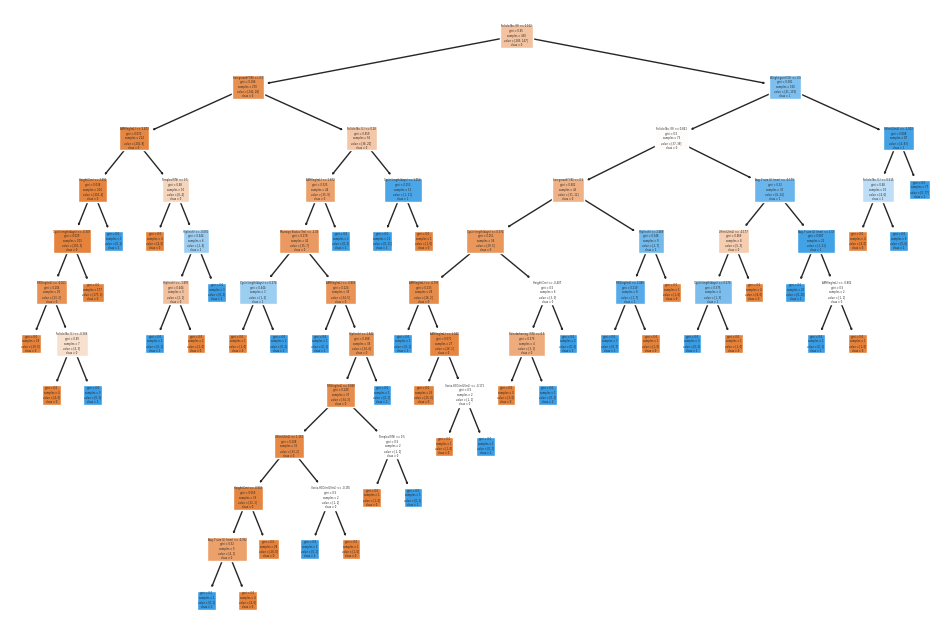

In [ ]:
# Step 1: Create the unpruned decision tree and plot it
dt_classifier_unpruned = DecisionTreeClassifier(random_state=42)
dt_classifier_unpruned.fit(X_train_new, y_train_new)

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_unpruned, feature_names=X_full_new.columns, class_names=["0", "1"], filled=True)
plt.savefig("unpruned_decision_tree.png", dpi=300)
plt.show()

In [ ]:
# Step 2: Apply the unpruned decision tree to the test set and compare predicted responses and observed responses
y_pred_unpruned = dt_classifier_unpruned.predict(X_test_new)
accuracy_unpruned = accuracy_score(y_test_new, y_pred_unpruned)
print("Accuracy (Unpruned Tree) on Test Set:", accuracy_unpruned)

# Calculate and print the accuracy on the training set
y_pred_train_unpruned = dt_classifier_unpruned.predict(X_train_new)
accuracy_train_unpruned = accuracy_score(y_train_new, y_pred_train_unpruned)
print("Accuracy (Unpruned Tree) on Training Set:", accuracy_train_unpruned)

Accuracy (Unpruned Tree) on Test Set: 0.8055555555555556
Accuracy (Unpruned Tree) on Training Set: 1.0


Best Tree Depth: 5


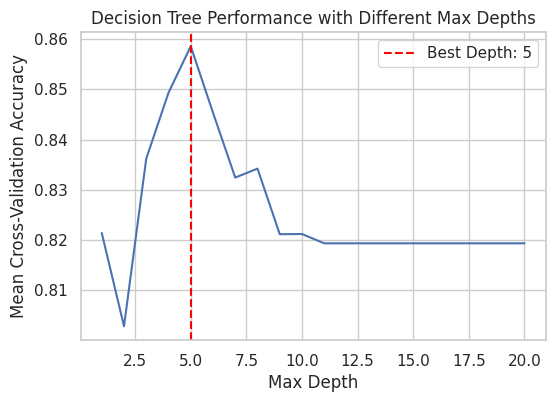

In [ ]:
# Step 3: Use cross-validation to select the best tree depth and plot the performance curve
max_depth_values = range(1, 21)
cv_scores = []

for max_depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_accuracy = cross_val_score(dt_classifier, X_full_new, y_full_new, cv = 10).mean()
    cv_scores.append(cv_accuracy)

best_depth_index = np.argmax(cv_scores)
best_depth = max_depth_values[best_depth_index]
print("Best Tree Depth:", best_depth)

# Plot the performance curve
plt.plot(list(max_depth_values), cv_scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Decision Tree Performance with Different Max Depths')

# Draw a line at the best max depth
plt.axvline(x=best_depth, color='red', linestyle='--', label=f'Best Depth: {best_depth}')

plt.legend()
plt.show();

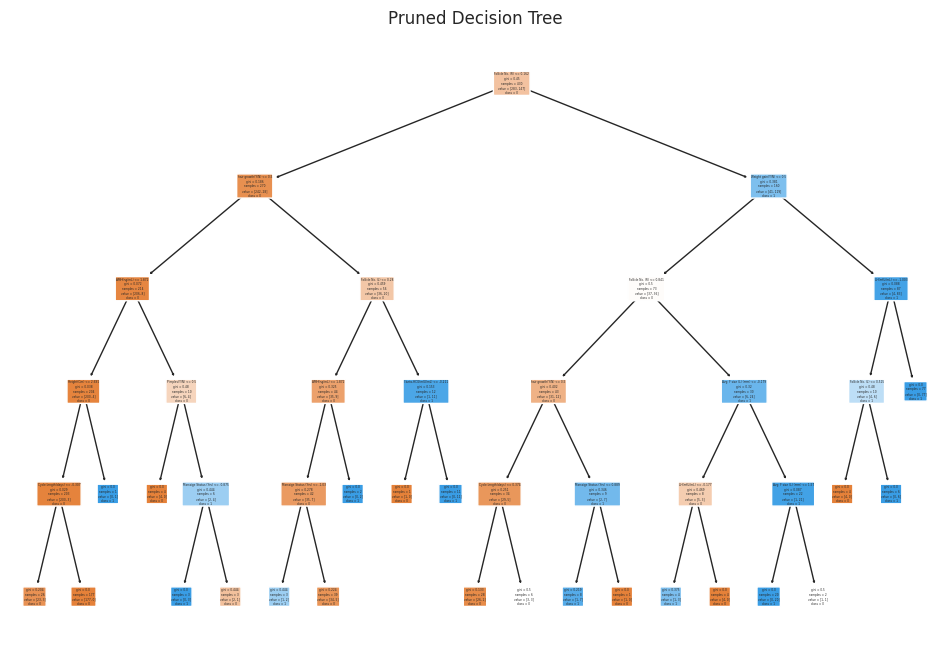

Accuracy (Pruned Tree) on Test Set: 0.8240740740740741
F1-score (Pruned Tree) on Test Set: 0.6666666666666666
Precision (Pruned Tree) on Test Set: 0.6785714285714286
Recall (Pruned Tree) on Test Set: 0.6551724137931034


In [ ]:
# Step 4: Prune the tree using the best number of nodes and apply it to the test set
dt_pruned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_pruned.fit(X_train_new, y_train_new)

# Plot the pruned Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_pruned, filled=True, feature_names=X_train_new.columns, class_names=['0', '1'], rounded=True)
plt.title("Pruned Decision Tree")
plt.savefig("pruned_decision_tree.png", dpi=300)
plt.show()

y_pred_pruned = dt_pruned.predict(X_test_new)
accuracy_pruned = accuracy_score(y_test_new, y_pred_pruned)
print("Accuracy (Pruned Tree) on Test Set:", accuracy_pruned)

precision_pruned = precision_score(y_test_new, y_pred_pruned)
recall_pruned = recall_score(y_test_new, y_pred_pruned)
f1_pruned = f1_score(y_test_new, y_pred_pruned)

print("F1-score (Pruned Tree) on Test Set:", f1_pruned)
print("Precision (Pruned Tree) on Test Set:", precision_pruned)
print("Recall (Pruned Tree) on Test Set:", recall_pruned)

After pruning, the Decision Tree achieved a depth of five, consisting of five levels from the root to the leaf nodes. The pruned tree demonstrated improved performance on the test set, with an accuracy of approximately 82.41%, compared with the unpruned version, which had an accuracy of approximately 80.55% on the same test set.

The key nodes in the pruned Decision Tree that significantly contribute to the classification process are as follows. Root Node: The initial split is based on the "Follicle No. (R)" feature, with a threshold of 7.5. This condition was the primary factor used to divide data.

Depth 1: At this level, the tree considers the "hair growth(Y/N)" feature to further split the data. This feature helps to distinguish between different patterns of hair growth.

Depth 2: The tree examines the "AMH(ng/mL)" feature, with a threshold of 17.3, to make additional divisions based on Anti-Mullerian Hormone levels.

Depth 3: At this level, several features such as "Cycle length(days)", "PRG(ng/mL)", and "Pimples(Y/N)", come into play. These features aid in differentiating classes based on menstrual cycle length, progesterone levels, and the presence of pimples.

Depths 4 and 5: The final levels involve features such as Marriage Status (Yrs)", "Follicle No. (L)", "Hip(inch), “and "LH(mIU/mL)". These features contribute to the final prediction and represent various conditions related to marital status, follicle count in the left ovary, hip size, and Luteinizing Hormone levels.

By employing cross-validation to select the optimal tree depth, we strike a balance between the model complexity and generalization. The pruned Decision Tree is more interpretable and less likely to overfit, making it a reliable choice for predicting new data points. It provides insights into the decision-making process for the classification task while achieving better performance on unseen data compared with the unpruned version.

The final Decision Tree model provides a clear and interpretable classification model that can efficiently classify instances into two classes: Class 0 and Class 1.

Starting at the root node, the data splits based on the "Follicle No. (R)" feature, with a threshold of 7.5. If the value is less than or equal to 7.5, the tree goes to the left branch; otherwise, it goes to the right branch.

Next, the tree checks the "hair growth(Y/N)" feature. If it is less than or equal to 0.5, the tree moves to the left branch; otherwise, it goes to the right branch.

If "hair growth(Y/N)" is less than or equal to 0.5, the tree examines the "AMH(ng/mL)" feature. If it's less than or equal to 17.3, the tree moves to the left branch; otherwise, it goes to the right branch.


For instances with "AMH(ng/mL)" less than or equal to 17.3 and "Cycle length(days)" less than or equal to 4.5, the tree checks "PRG(ng/mL)". If it's less than or equal to 0.445, the predicted class is 0. Otherwise, the predicted class is 1.

If "AMH(ng/mL)" is less than or equal to 17.3 and "Cycle length(days)" is greater than 4.5, the tree checks "Pimples(Y/N)". If it's less than or equal to 0.5, the predicted class is 0. Otherwise, if "Marraige Status (Yrs)" is less than or equal to 3.5, the predicted class is 1; otherwise, it's 0.

For instances with "hair growth(Y/N)" greater than 0.5 and "Follicle No. (L)" less than or equal to 7.5, the tree checks "AMH(ng/mL)". If it's less than or equal to 17.3, the tree further examines "Marraige Status (Yrs)". If it's less than or equal to 2.75, the predicted class is 1; otherwise, it's 0.

If "AMH(ng/mL)" is less than or equal to 17.3 and "Marraige Status (Yrs)" is greater than 2.75, the predicted class is 1. If "Follicle No. (L)" is greater than 7.5 and "Marraige Status (Yrs)" is less than or equal to 15.5, the predicted class is 1; otherwise, it's 0. For instances with "Weight gain(Y/N)" greater than 0.5 and "Follicle No. (R)" less than or equal to 10.5, the tree checks "hair growth(Y/N)" and "Cycle length(days)" features to determine the predicted class.

If "Follicle No. (R)" is less than or equal to 10.5 and "hair growth(Y/N)" is greater than 0.5, the tree further examines "Hip(inch)" to predict the class. If "Hip(inch)" is less than or equal to 46.0, the predicted class is 1; otherwise, it's 0.

Finally, for instances with "LH(mIU/mL)" less than or equal to 0.435 and "Follicle No. (L)" less than or equal to 8.5, the predicted class is 1; otherwise, it's 0. For instances with "LH(mIU/mL)" greater than 0.435, the predicted class is 1.

This pruned Decision Tree serves as the best model for the classification task, providing meaningful insights into the classification process while achieving an accuracy of approximately 82.40% on the test set.

## **6.2 Random Forest**

Random Forest is a versatile machine-learning algorithm that can be used for both classification and regression tasks. This is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. Random forests can work effectively with datasets containing a mix of continuous and categorical variables.

In [ ]:
# Define which features are categorical
categorical_features = cols_ml_cat  # ['Gender', 'Education', 'Marital_Status']

# Create the preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to handle both continuous and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the full pipeline with preprocessing and the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Define the hyperparameters you want to tune
param_grid = {
    'classifier__n_estimators': np.linspace(50, 200, 4, dtype=int),
    'classifier__max_depth': [None, 10, 20]
    # Add other hyperparameters to tune if needed
}

# Create GridSearchCV with your model pipeline and hyperparameter grid
grid_search = GridSearchCV(model_pipeline, param_grid, cv=10, scoring='accuracy')

# Train the model on the training data
grid_search.fit(X_train_new, y_train_new)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test_new)

# Calculate metrics
accuracy = accuracy_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)

print("Accuracy for Test set:", accuracy)
print("F1-Score for Test set:", f1)
print("Precision for Test set:", precision)
print("Recall for Test set:", recall)

Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Accuracy for Test set: 0.8518518518518519
F1-Score for Test set: 0.7142857142857143
Precision for Test set: 0.7407407407407407
Recall for Test set: 0.6896551724137931


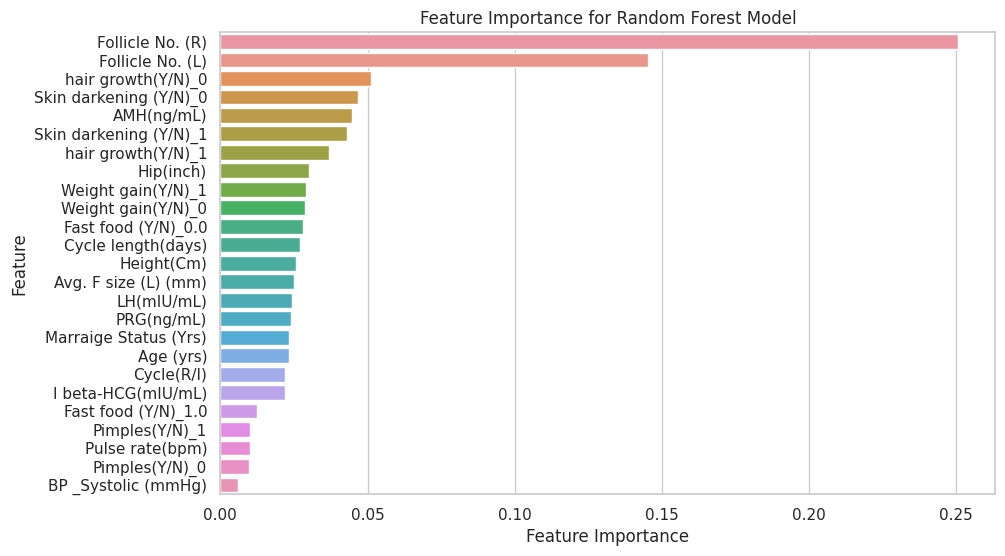

In [ ]:
# Get the feature importances from the best Random Forest model
feature_importances = best_estimator.named_steps['classifier'].feature_importances_

# Get the names of the features after one-hot encoding
encoded_feature_names = best_estimator.named_steps['preprocessor'].named_transformers_['cat']\
    .named_steps['onehot'].get_feature_names_out(input_features=categorical_features)

# Combine encoded feature names with continuous feature names
all_feature_names = np.concatenate([encoded_feature_names, cols_ml_cont])

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

The Random Forest model was trained and tuned with the following hyperparameters: max_depth of 10 and n_estimators (number of trees) set to 100. The model was evaluated on a test dataset, and the results indicated strong predictive performance.

With an accuracy of approximately 85%, the model correctly predicted the outcomes for a significant portion of instances. The F1-score, at approximately 71%, suggests that the model maintains a good balance between precision and recall. This balance is further emphasized by a precision of 74% and recall of 69%, indicating that the model is effective in correctly identifying positive instances and minimizing false positives.

These results collectively highlight the model's ability to generalize well on unseen data, while maintaining a reasonable trade-off between precision and recall. The selected hyperparameters contributed to a well-rounded and reliable Random Forest model for the given dataset.

In addition, when developing the model, the feature importance plot shows that Follicle No (R) is the most important variable. This was followed by Follicle No (L).

## **6.3 Logistic Regression**

Logistic Regression is a popular and fundamental classification algorithm that models the relationship between a set of input features and a binary target variable. It is particularly well-suited for datasets containing both continuous and categorical variables.

In [ ]:
#Logestic Regeression

logreg = LogisticRegression()
logreg.fit(X_train_new,y_train_new)

y_pred = logreg.predict(X_test_new)
accuracy = accuracy_score(y_test_new,y_pred)
conf_matrix = confusion_matrix(y_test_new,y_pred)
classification_rep = classification_report(y_test_new, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8796296296296297
Confusion Matrix:
[[73  6]
 [ 7 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        79
           1       0.79      0.76      0.77        29

    accuracy                           0.88       108
   macro avg       0.85      0.84      0.85       108
weighted avg       0.88      0.88      0.88       108



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Accuracy on Test Data: 0.8518518518518519
F1-score on Test Data: 0.7142857142857143
Precision on Test Data: 0.7407407407407407
Recall on Test Data: 0.6896551724137931
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        79
           1       0.74      0.69      0.71        29

    accuracy                           0.85       108
   macro avg       0.81      0.80      0.81       108
weighted avg       0.85      0.85      0.85       108

Confusion Matrix on Test Data:
[[72  7]
 [ 9 20]]


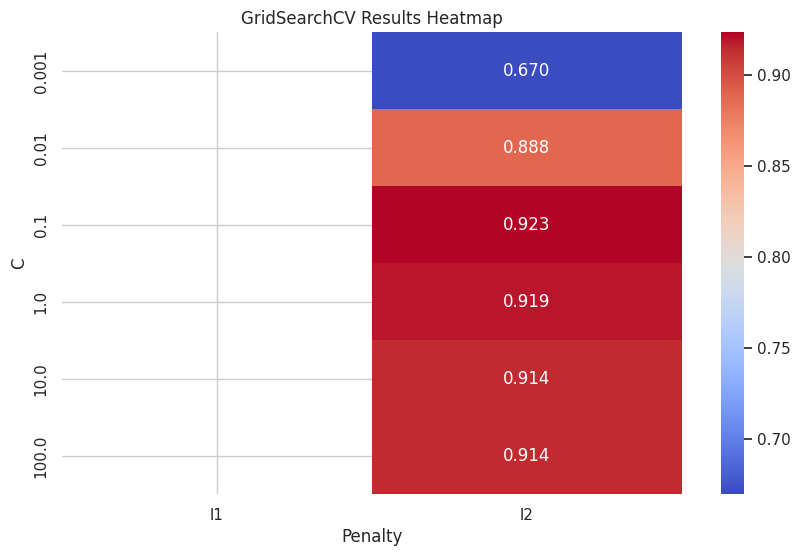

In [ ]:
# Create Logistic Regression model
logreg = LogisticRegression()

# Define hyperparameters for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# Get the best Logistic Regression model from GridSearchCV
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_logreg_model.predict(X_test_new)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_new, y_pred)
print("Accuracy on Test Data:", accuracy)

# Calculate F1-score, precision, and recall
f1_score = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

print("F1-score on Test Data:", f1_score)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)

# Print the classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_pred))

# Reshape the results for the heatmap
results_df = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results_df.pivot(index='param_C', columns='param_penalty', values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('GridSearchCV Results Heatmap')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.show()

The Logistic Regression model exhibited promising performance across various evaluation metrics on the test dataset. With an accuracy of approximately 85.19%, the model demonstrated its capability to make accurate predictions and correctly classify a significant portion of the instances.

An F1-score of approximately 0.71 indicated a balanced blend of precision and recall. This highlights the model's proficiency in achieving a harmonious trade-off between minimizing false positives and capturing true positives.

Furthermore, a precision of approximately 0.74 signified the model's skill in accurately identifying positive instances among its predictions, while a recall of approximately 0.69 underscored its ability to successfully capture a noteworthy proportion of actual positive instances, thus minimizing false negatives.

In summary, the robust performance of the Logistic Regression model in terms of accuracy, F1-score, precision, and recall underscores its efficacy for classification tasks, particularly when striving for a balance between various evaluation metrics is essential.

## **6.4 Linear Discriminant Analysis (LDA)**

LDA (Linear Discriminant Analysis) is a supervised machine learning method used for classification tasks. In this project, we employ LDA to explore whether a linear combination of blood indicators and physical metrics can effectively differentiate individuals with PCOS from non-afflicted ones, aiding in predicting the onset of the condition.

## 6.4.1 LDA Assumptions
The assumptions for Linear Discriminant Analysis (LDA):

1) Normality: LDA assumes that each class follows a multivariate normal distribution. This means that the distribution of features for each class should be approximately bell-shaped and symmetric.

2) Equal Covariance: LDA assumes that the covariance matrices of all classes are equal. In other words, the spread and orientation of the data in each class are similar.

3) Independence: LDA assumes that the features are independent of each other within each class. However, this assumption is more restrictive than in QDA, where features are allowed to have different covariance.

4) Class Prior Probability: LDA assumes that each class has the same prior probability. In other words, the classes are equally likely in the population.

Before applying LDA, it is crucial to assess these assumptions on the data to ensure that the method is suitable for the classification task and that the results are reliable and interpretable.

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from scipy.stats import shapiro, levene

# Assumptions Testing for LDA
def lda_assumptions_test(X_train, y_train):
    # Normality Test
    normality_passed = True
    for col in X_train.columns:
        stat, p = shapiro(X_train[col])
        if p < 0.05:
            normality_passed = False
            print(f"Feature {col} does not follow a normal distribution (p-value: {p})")

    # Homoscedasticity Test
    var_equal = True
    for col in X_train.columns:
        stat, p = levene(X_train[y_train == 0][col], X_train[y_train == 1][col])
        if p < 0.05:
            var_equal = False
            print(f"Variances for feature {col} are not equal between classes (p-value: {p})")

    return normality_passed, var_equal

# Create LDA Model
def lda_model(X_train, y_train, X_test, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predict on the Training Set
    y_pred_train = lda.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy:", accuracy_train)

    # Predict on the Test Set
    y_pred_test = lda.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy:", accuracy_test)

    return lda

# Data Preprocessing and Splitting
# Use obtained X_full_new and y_full_new
# Use cols_ml_cat and cols_ml_cont to split the data
X_train, X_test, y_train, y_test = train_test_split(X_full_new, y_full_new, test_size=0.2, random_state=42)

# Assumptions Testing
normality_passed, var_equal = lda_assumptions_test(X_train[cols_ml_cont], y_train)

# If Assumptions are met, build the model and make predictions
if normality_passed and var_equal:
    lda_model(X_train[cols_ml_cont], y_train, X_test[cols_ml_cont], y_test)
else:
    print("LDA assumptions are not satisfied.")

Feature Age (yrs) does not follow a normal distribution (p-value: 4.11312939831987e-05)
Feature Height(Cm) does not follow a normal distribution (p-value: 0.00031713821226730943)
Feature Pulse rate(bpm) does not follow a normal distribution (p-value: 2.9959165140545227e-33)
Feature Cycle(R/I) does not follow a normal distribution (p-value: 3.4013192351777473e-31)
Feature Cycle length(days) does not follow a normal distribution (p-value: 1.315525104867034e-20)
Feature Marraige Status (Yrs) does not follow a normal distribution (p-value: 2.0423727880897365e-14)
Feature I beta-HCG(mIU/mL) does not follow a normal distribution (p-value: 3.065381028366003e-39)
Feature LH(mIU/mL) does not follow a normal distribution (p-value: 4.790173975973144e-19)
Feature Hip(inch) does not follow a normal distribution (p-value: 1.2149570238761953e-06)
Feature AMH(ng/mL) does not follow a normal distribution (p-value: 2.9150012821630116e-26)
Feature PRG(ng/mL) does not follow a normal distribution (p-value

## 6.4.2 LDA Model

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Create LDA Model
def lda_model(X_train, y_train, X_test, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predict on the Training Set
    y_pred_train = lda.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy (LDA):", round(accuracy_train,4))

    # Predict on the Test Set
    y_pred_test = lda.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy (LDA):", round(accuracy_test, 4))

    return lda

# Use the obtained X_full_new and y_full_new
# Use cols_ml_cat and cols_ml_cont to split the data
X_train, X_test, y_train, y_test = train_test_split(X_full_new, y_full_new, test_size=0.2, random_state=42)

# Build and evaluate the LDA model
lda_model(X_train[cols_ml_cont], y_train, X_test[cols_ml_cont], y_test)

Train Accuracy (LDA): 0.9023
Test Accuracy (LDA): 0.8241


LinearDiscriminantAnalysis()


Based on the LDA analysis results, it is observed that the assumptions of LDA are not fully met due to the lack of normality in certain features and unequal variances across different classes in some features. Despite this, the LDA model achieved an accuracy of approximately 90.23% on the training set and about 82.41% on the test set. This suggests that LDA demonstrates respectable classification performance on this dataset even in the presence of violated assumptions.

However, considering the potential impact of violated assumptions on model stability and reliability, it is recommended to further explore alternative classification algorithms or consider additional data preprocessing steps to potentially enhance predictive performance and ascertain the optimal analytical approach. This could involve feature transformations, outlier handling, and addressing class imbalance, among other techniques, to better align with the dataset's characteristics.

## **6.5 Quadratic Discriminant Analysis (QDA)**

QDA (Quadratic Discriminant Analysis) is a classification technique that allows for varying covariance matrices between different classes. In this project, we apply QDA to uncover more complex nonlinear relationships, aiming for a more accurate delineation between individuals with PCOS and non-afflicted individuals, thus enhancing predictive performance.

## 6.5.1 QDA Assumptions
The assumptions for Quadratic Discriminant Analysis (QDA):

1) Normality: Each class is assumed to follow a multivariate normal distribution. This means that the distribution of features for each class should be approximately bell-shaped and symmetric.

2) Equal Covariance: QDA assumes that the covariance matrices of all classes are equal. In other words, the spread and orientation of the data in each class are similar.

3) Independence: The features are assumed to be independent of each other within each class. This assumption is less restrictive than in LDA, where features are assumed to have equal covariance.

4) Class Prior Probability: QDA assumes that each class has the same prior probability. In other words, the classes are equally likely in the population.

Before applying QDA, it is essential to check these assumptions on the data to ensure that the method is appropriate for the classification task at hand.

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Assumptions Testing for QDA
def qda_assumptions_test(X_train, y_train):
    # Normality Test
    normality_passed = True
    for col in X_train.columns:
        stat, p = shapiro(X_train[col])
        if p < 0.05:
            normality_passed = False
            print(f"Feature {col} does not follow a normal distribution (p-value: {p})")

    # Homoscedasticity Test
    var_equal = True
    for col in X_train.columns:
        stat, p = levene(X_train[y_train == 0][col], X_train[y_train == 1][col])
        if p < 0.05:
            var_equal = False
            print(f"Variances for feature {col} are not equal between classes (p-value: {p})")

    return normality_passed, var_equal

# Create QDA Model
def qda_model(X_train, y_train, X_test, y_test):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)

    # Predict on the Training Set
    y_pred_train = qda.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy:", accuracy_train)

    # Predict on the Test Set
    y_pred_test = qda.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy:", accuracy_test)

    return qda

# Use the data and obtained X_full_new and y_full_new
# Use cols_ml_cat and cols_ml_cont to split the data
X_train, X_test, y_train, y_test = train_test_split(X_full_new, y_full_new, test_size=0.2, random_state=42)

# Assumptions Testing
normality_passed, var_equal = qda_assumptions_test(X_train[cols_ml_cont], y_train)

# If Assumptions are met, build the model and make predictions
if normality_passed and var_equal:
    qda_model(X_train[cols_ml_cont], y_train, X_test[cols_ml_cont], y_test)
else:
    print("QDA assumptions are not satisfied.")

Feature Age (yrs) does not follow a normal distribution (p-value: 4.11312939831987e-05)
Feature Height(Cm) does not follow a normal distribution (p-value: 0.00031713821226730943)
Feature Pulse rate(bpm) does not follow a normal distribution (p-value: 2.9959165140545227e-33)
Feature Cycle(R/I) does not follow a normal distribution (p-value: 3.4013192351777473e-31)
Feature Cycle length(days) does not follow a normal distribution (p-value: 1.315525104867034e-20)
Feature Marraige Status (Yrs) does not follow a normal distribution (p-value: 2.0423727880897365e-14)
Feature I beta-HCG(mIU/mL) does not follow a normal distribution (p-value: 3.065381028366003e-39)
Feature LH(mIU/mL) does not follow a normal distribution (p-value: 4.790173975973144e-19)
Feature Hip(inch) does not follow a normal distribution (p-value: 1.2149570238761953e-06)
Feature AMH(ng/mL) does not follow a normal distribution (p-value: 2.9150012821630116e-26)
Feature PRG(ng/mL) does not follow a normal distribution (p-value

## 6.5.2 QDA Model

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Create QDA Model
def qda_model(X_train, y_train, X_test, y_test):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)

    # Predict on the Training Set
    y_pred_train = qda.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy (QDA):", round(accuracy_train, 4))

    # Predict on the Test Set
    y_pred_test = qda.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy (QDA):", round(accuracy_test, 4))

    return qda

# Use obtained X_full_new and y_full_new
# Use cols_ml_cat and cols_ml_cont to split the data
X_train, X_test, y_train, y_test = train_test_split(X_full_new, y_full_new, test_size=0.2, random_state=42)

# Build and evaluate the QDA model
qda_model(X_train[cols_ml_cont], y_train, X_test[cols_ml_cont], y_test)

Train Accuracy (QDA): 0.7628
Test Accuracy (QDA): 0.6759


QuadraticDiscriminantAnalysis()

Based on the results of the QDA analysis, it is evident that several assumptions necessary for QDA are not met, as indicated by non-normality of certain features and unequal variances across different classes in certain features. Despite these assumptions not being satisfied, the QDA model achieved an accuracy of approximately 76.28% on the training set and about 67.59% on the test set. This suggests that the QDA model, similar to LDA, demonstrates moderate classification performance on this dataset even in the presence of violated assumptions.

However, considering the observed differences in performance between LDA and QDA, it is apparent that the LDA model outperformed the QDA model in terms of accuracy on both the training and test sets. While both LDA and QDA showcased the potential to capture underlying patterns in the data, further analysis and potentially additional preprocessing steps could be explored to improve the performance of QDA, given its sensitivity to the assumptions. It is also worthwhile to consider other machine learning algorithms for comparison to identify the optimal method for predicting PCOS outcomes.

The performance of the two models differs significantly, with LDA outperforming QDA in terms of accuracy on both the training and test sets. Let's analyze the results:

LDA: Linear Discriminant Analysis (LDA) demonstrates better generalization to unseen data compared to QDA. The model achieves high accuracy on both the training and test sets, indicating that it can effectively classify instances into the appropriate classes. This suggests that the data may have a linearly separable structure, making LDA a suitable choice for the classification task.

QDA: Quadratic Discriminant Analysis (QDA) also performs reasonably well but falls short compared to LDA. The model shows a lower accuracy on the test set, which suggests that it might be slightly overfitting the training data. QDA assumes different covariance matrices for each class, making it more flexible but also more prone to overfitting, especially when the training data is limited.

In conclusion, the LDA model provides a better balance between model complexity and generalization, resulting in higher accuracy on unseen data. It is likely that the data has a linearly separable structure, making LDA a more appropriate choice for this particular classification task. However, it is always essential to consider other evaluation metrics and possibly fine-tune the models further to achieve the best performance.

## **6.6 Support Vector Machine**

Support Vector Machine (SVM) is a powerful machine learning algorithm that can work effectively with datasets containing a mixture of continuous and categorical variables. Kernel functions are used to map the original feature space into a higher-dimensional space, enabling the SVM to capture complex relationships.

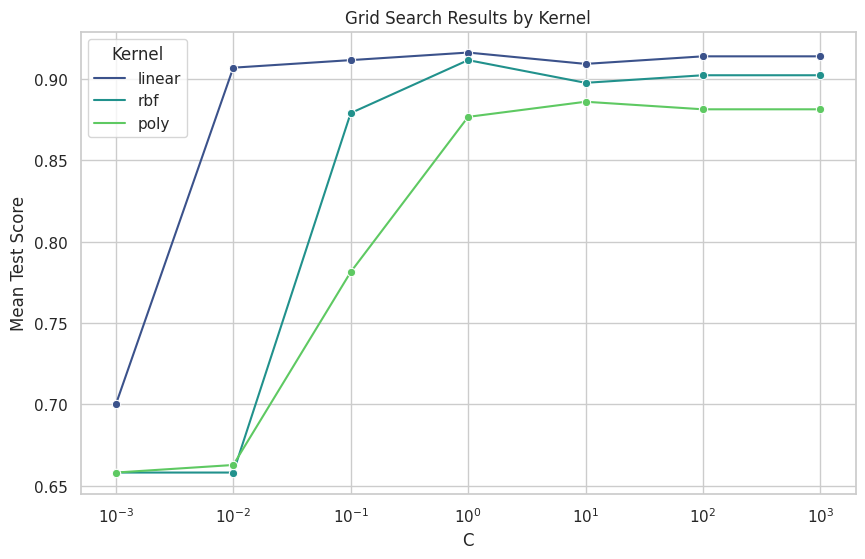

{'C': 1, 'kernel': 'linear'}


In [ ]:
# Support Vector Machines (SVM)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train_new, y_train_new)

# Get the grid search results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']

# Extract the parameters and scores from the grid search results
params = results['params']
mean_scores = results['mean_test_score']

# Create a DataFrame to store the data for plotting
data = {'Kernel': [param['kernel'] for param in params],
        'C': [param['C'] for param in params],
        'Mean Test Score': mean_scores}
df = pd.DataFrame(data)

# Plot the results as a scatter plot with hue by kernel
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='C', y='Mean Test Score', hue='Kernel', palette='viridis', marker='o')
plt.xscale('log')  # Using log scale for better visualization of C values
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results by Kernel')
plt.grid(True)
plt.legend(title='Kernel')
plt.show()

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

In [ ]:
y_pred = best_model.predict(X_test_new)

accuracy = accuracy_score(y_test_new, y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred)
classification_rep = classification_report(y_test_new, y_pred)

# Calculate and print accuracy, precision, recall, and F1-score
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

print("Accuracy with test data:", accuracy)
print("F1-score with test data:", f1)
print("Precision with test data:", precision)
print("Recall with test data:", recall)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy with test data: 0.8703703703703703
F1-score with test data: 0.75
Precision with test data: 0.7777777777777778
Recall with test data: 0.7241379310344828
Confusion Matrix:
[[73  6]
 [ 8 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        79
           1       0.78      0.72      0.75        29

    accuracy                           0.87       108
   macro avg       0.84      0.82      0.83       108
weighted avg       0.87      0.87      0.87       108



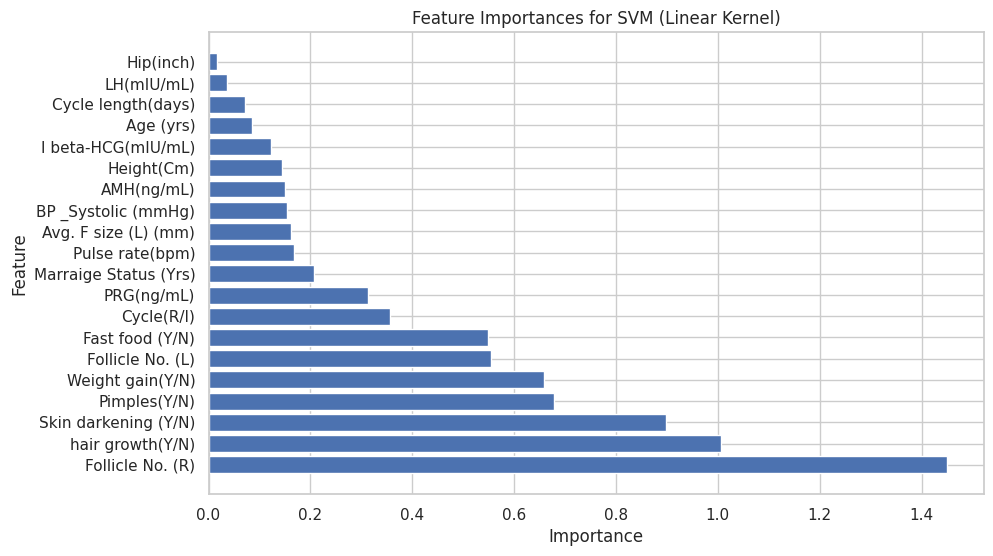

In [ ]:
# Train the best SVM model on the training data
best_model.fit(X_train_new, y_train_new)

# Get the absolute values of coefficients for linear kernel SVM
if best_params['kernel'] == 'linear':
    feature_importances = np.abs(best_model.coef_)[0]
else:
    feature_importances = None  # For non-linear kernels, feature importance interpretation is different

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for SVM (Linear Kernel)')
plt.show()

The SVM model, optimized with {'C':1, 'kernel': 'linear'}, showcased impressive performance on a dataset comprising both continuous and categorical variables. It achieved an accuracy of approximately 87%, illustrating its proficiency in distinguishing between different classes. The precision was 77.8%, indicating the model's precision in positive predictions and its ability to mitigate false positives. Meanwhile, a recall of 72.4% highlighted the model's success in capturing and accurately predicting actual positive instances. A balanced F1-score of 0.75 underscored the model's equilibrium between precision and recall. Also, in developing the model, the feature importance plot shows that Follicle No (R) is the most important variable. This is followed by hair growth. It is clear that this order is different from the Random Forest version.

## **6.7 K-Nearest Neighbor**

K-Nearest Neighbors (KNN) is a simple yet effective machine learning algorithm used for both classification and regression tasks. It is a non-parametric and instance-based learning algorithm, meaning that it does not make strong assumptions about the underlying data distribution. Instead, it relies on local characteristics of the data. It can be applied to datasets with continuous and categorical variables, and proper preprocessing, appropriate distance metrics, and careful parameter tuning are essential to ensure its effectiveness.

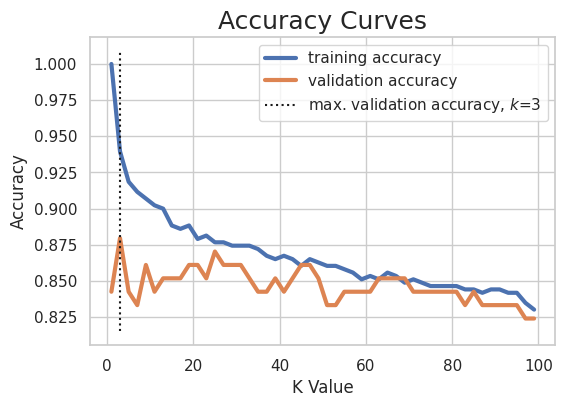

In [ ]:
# plit the dataset into training and validation sets
X_train, X_val, y_train, y_val = X_train_new, X_test_new, y_train_new, y_test_new

ks = np.arange(1, 101, 2)
accs_val = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_new, y_train_new, cv=10, scoring='accuracy')
    accs_val.append(scores.mean())

# Loop over different values of K and calculate training and validation accuracies
ks = np.arange(1, 101, 2)
accs_tr = []
accs_val = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc_tr = accuracy_score(y_train, model.predict(X_train))
    acc_val = accuracy_score(y_val, model.predict(X_val))
    accs_tr.append(acc_tr)
    accs_val.append(acc_val)

# Find the K value with the highest validation accuracy
k = ks[np.argmax(accs_val)]

# Plot the accuracy curves
plt.plot(ks, accs_tr, label="training accuracy", lw=3)
plt.plot(ks, accs_val, label="validation accuracy", lw=3)
plt.vlines(k, *plt.ylim(), colors="k", linestyles=":", label=f"max. validation accuracy, $k$={k}")
plt.title("Accuracy Curves", fontsize=18)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create KNN model
n_neighbors = 3  # Set the value of K
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

# Model training
knn_classifier.fit(X_train_new, y_train_new)

# Predict on the test set
y_pred_test = knn_classifier.predict(X_test_new)

# Calculate metrics
test_accuracy = accuracy_score(y_test_new, y_pred_test)

f1_test = f1_score(y_test_new, y_pred_test)

precision_test = precision_score(y_test_new, y_pred_test)

recall_test = recall_score(y_test_new, y_pred_test)

print("Test Accuracy (KNN):", test_accuracy)

print("Test F1-Score (KNN):", f1_test)

print("Test Precision (KNN):", precision_test)

print("Test Recall (KNN):", recall_test)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_new, y_pred_test)
classification_rep = classification_report(y_test_new, y_pred_test)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_rep)

Test Accuracy (KNN): 0.8796296296296297
Test F1-Score (KNN): 0.7547169811320755
Test Precision (KNN): 0.8333333333333334
Test Recall (KNN): 0.6896551724137931
Confusion Matrix:
[[75  4]
 [ 9 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.83      0.69      0.75        29

    accuracy                           0.88       108
   macro avg       0.86      0.82      0.84       108
weighted avg       0.88      0.88      0.88       108



The K-Nearest Neighbors (KNN) model with k = 3 exhibited a notable performance on the test dataset. The model effectively classified a substantial proportion of the instances with a test accuracy of approximately 87.96 %. Its test F1-score of 0.7547 reflects a balanced trade-off between precision and recall, indicating its ability to minimize false positives while capturing true positives. The model's test precision of 0.8333 signifies accurate positive predictions, underscoring its proficiency in reducing false-positive predictions. Moreover, a test recall of 0.6897 demonstrated the capacity of the model to capture and predict actual positive instances. Overall, the KNN model with k = 3 demonstrated promising capabilities for handling diverse data and making accurate predictions.

## **6.8 Guassian Naive Bayes**

The Gaussian Naive Bayes algorithm is primarily designed to handle continuous data, as it assumes that the features within each class follow a Gaussian (normal) distribution. It estimates the mean and standard deviation of each feature for each class in order to calculate the probability of an instance belonging to a particular class.

Accuracy: 0.7870
F1-score: 0.69
Precision: 0.5652
Recall: 0.8966


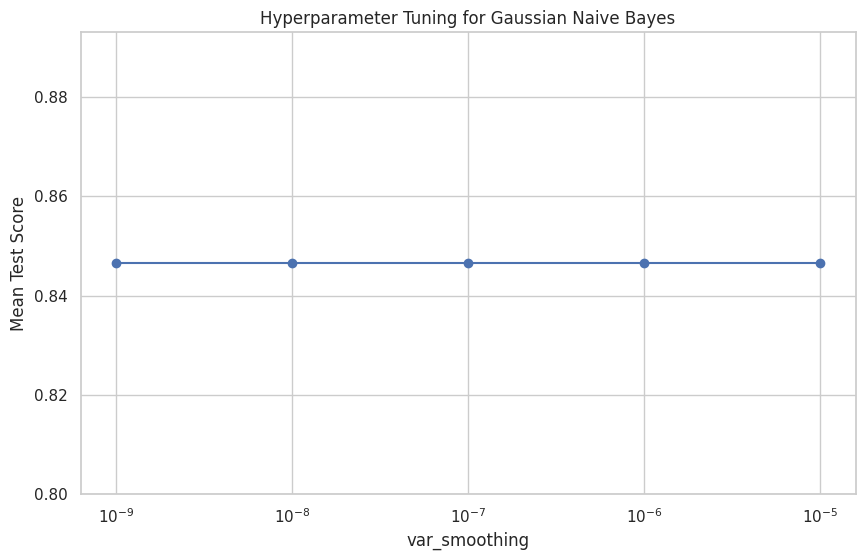

In [ ]:
# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define hyperparameters to tune
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(nb_classifier, param_grid, cv=10)
grid_search.fit(X_train_new, y_train_new)

# Get the best hyperparameters
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Train the model with the best hyperparameters
best_nb_classifier = GaussianNB(var_smoothing=best_var_smoothing)
best_nb_classifier.fit(X_train_new, y_train_new)

# Evaluate the model on the test set
y_pred = best_nb_classifier.predict(X_test_new)

# Calculate F1-score, precision, and recall
accuracy = accuracy_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot the hyperparameter tuning results
results = grid_search.cv_results_
var_smoothing_values = results['param_var_smoothing'].data.astype(float)
mean_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning for Gaussian Naive Bayes')
plt.grid(True)
plt.show()

The Gaussian Naive Bayes (GNB) model is encapsulated by a set of key metrics that collectively showcase its competence in classification tasks. With an accuracy rate of 79%, GNB demonstrated a noteworthy ability to correctly classify a substantial proportion of instances within the dataset. This level of accuracy underscores the model's ability to distinguish between various classes, making it a promising tool for predictive tasks.

Upon closer analysis of its predictive capabilities, the GNB presents an F1-score of 69%, indicating a balanced trade-off between precision and recall. This balance signifies the capability of the model to minimize the occurrence of false positives while simultaneously capturing true positives effectively. The precision score of 57% reflects the accuracy of GNB's positive predictions. It is important to note that, while this showcases the model's precision, the trade-off might involve a higher rate of false positives. Impressively, the GNB achieved a high recall score of 90%, indicating its proficiency in identifying and predicting actual positive instances. However, this heightened recall may come at the cost of an increased number of false positives. In essence, GNB exhibits a comprehensive performance profile characterized by accuracy, recall, and precision, offering insights that aid in understanding its strengths and considerations for optimization in classification scenarios.

## **6.9 Gradient Boosting**

Gradient Boosting is a powerful machine learning technique that belongs to the ensemble learning category. It is widely used for both classification and regression tasks because of its ability to build strong predictive models by combining the outputs of multiple weak learners. The term "gradient" refers to the optimization process that minimizes errors in subsequent models. The ability of gradient Boosting to learn complex relationships in data, its sequential nature that corrects previous errors, and its regularization techniques contribute to its effectiveness.

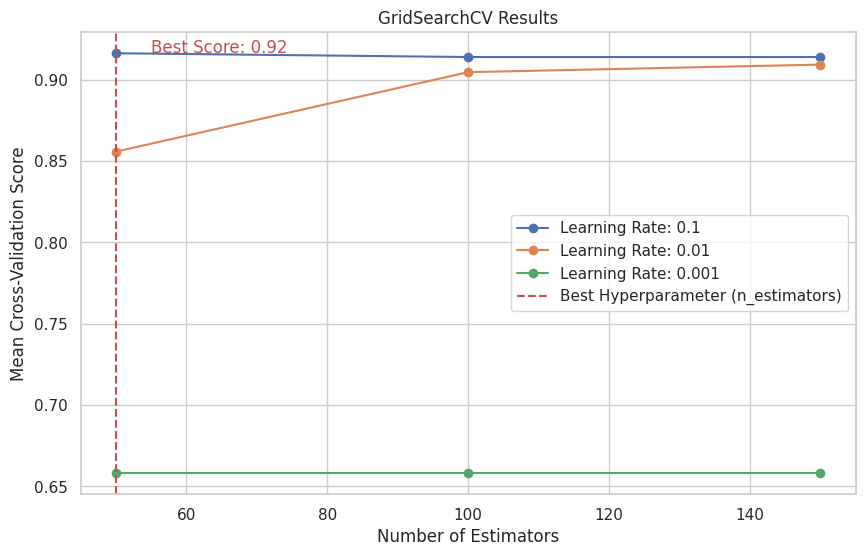

Accuracy on Test Data: 0.8518518518518519
F1-score on Test Data: 0.7037037037037037
Precision on Test Data: 0.76
Recall on Test Data: 0.6551724137931034
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.76      0.66      0.70        29

    accuracy                           0.85       108
   macro avg       0.82      0.79      0.80       108
weighted avg       0.85      0.85      0.85       108

Confusion Matrix on Test Data:
[[73  6]
 [10 19]]


In [ ]:
# Gradient Boosting Machines (GBM)

# Create the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbm_classifier, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# Get the results of GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the results
plt.figure(figsize=(10, 6))
for learning_rate in param_grid['learning_rate']:
    plt.plot(param_grid['n_estimators'], results_df[results_df['param_learning_rate'] == learning_rate]['mean_test_score'],
             marker='o', label='Learning Rate: {}'.format(learning_rate))

plt.title('GridSearchCV Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validation Score')
plt.legend()
plt.grid(True)

# Find the best hyperparameters
best_idx = np.argmax(results_df['mean_test_score'])
best_n_estimators = results_df.loc[best_idx, 'param_n_estimators']
best_learning_rate = results_df.loc[best_idx, 'param_learning_rate']
best_score = results_df.loc[best_idx, 'mean_test_score']

# Draw a vertical line to indicate the best hyperparameters
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label='Best Hyperparameter (n_estimators)')
plt.text(best_n_estimators + 5, best_score, f'Best Score: {best_score:.2f}', color='r')

plt.legend()
plt.show()

# Get the best GBM model from GridSearchCV
best_gbm_model = grid_search.best_estimator_

# Train the best model on the training data
best_gbm_model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred = best_gbm_model.predict(X_test_new)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_new, y_pred)
print("Accuracy on Test Data:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

print("F1-score on Test Data:", f1)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)

# Print the classification report
print("Classification Report on Test Data:")
print(classification_report(y_test_new, y_pred))

# Print the confusion matrix
print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test_new, y_pred))

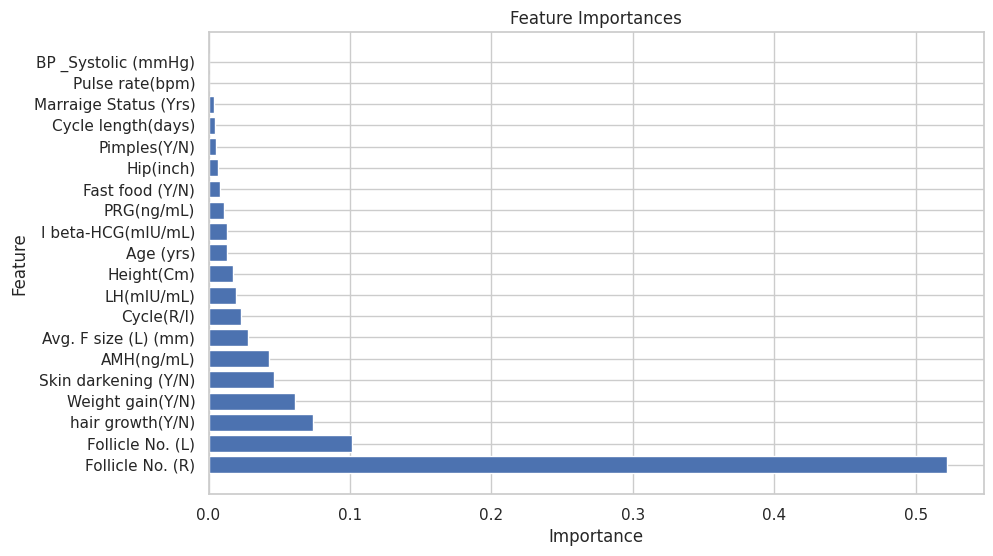

In [ ]:
# Get feature importances from the best GBM model
feature_importances = best_gbm_model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

The Gradient Boosting model exhibited a robust performance across various evaluation metrics on the test dataset. The model proved its ability to make accurate predictions across multiple classes with an accuracy of 85.19 %. This signifies its effectiveness in correctly classifying a substantial portion of the instances.

Further analysis revealed a precision of 76%, indicating the model's proficiency in accurately identifying positive instances among its predictions. Complementing this, a recall score of 65.52% highlights the model's success in capturing a considerable proportion of actual positive instances, demonstrating its ability to avoid missing positive cases.

Moreover, the F1-score, at 70.37%, reflects a harmonious balance between precision and recall. This demonstrates the model's capability to manage the trade-off between minimizing false positives and effectively capturing true positives.

In summary, the performance of the Gradient Boosting model shows its accuracy, precision, recall, and F1-score, collectively making it a promising tool for classification tasks, particularly in scenarios in which achieving a balanced compromise between various metrics is essential. Also, in developing the model, the feature importance plot shows that Follicle No (R) is the most important variable. This was followed by weight gain. It is clear that this order is different from the Random Forest and SVM versions.

#### **6.9.1 Gradient Boosting - XGBoost**

In [ ]:
# Create the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# Get the results of GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the results
plt.figure(figsize=(10, 6))
for learning_rate in param_grid['learning_rate']:
    plt.plot(param_grid['n_estimators'], results_df[results_df['param_learning_rate'] == learning_rate]['mean_test_score'],
             marker='o', label='Learning Rate: {}'.format(learning_rate))

plt.title('GridSearchCV Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validation Score')
plt.legend()
plt.grid(True)

# Find the best hyperparameters
best_idx = np.argmax(results_df['mean_test_score'])
best_n_estimators = results_df.loc[best_idx, 'param_n_estimators']
best_learning_rate = results_df.loc[best_idx, 'param_learning_rate']
best_score = results_df.loc[best_idx, 'mean_test_score']

# Draw a vertical line to indicate the best hyperparameters
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label='Best Hyperparameter (n_estimators)')
plt.text(best_n_estimators + 5, best_score, f'Best Score: {best_score:.2f}', color='r')

plt.legend()
plt.show()

# Get the best XGBoost model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Train the best model on the training data
best_xgb_model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test_new)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_new, y_pred)
print("Accuracy on Test Data:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)
print("F1-score on Test Data:", f1)

# Print the classification report
print("Classification Report on Test Data:")
print(classification_report(y_test_new, y_pred))

# Print the confusion matrix
print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test_new, y_pred))

NameError: name 'XGBClassifier' is not defined

# **7 Results and Discussion**

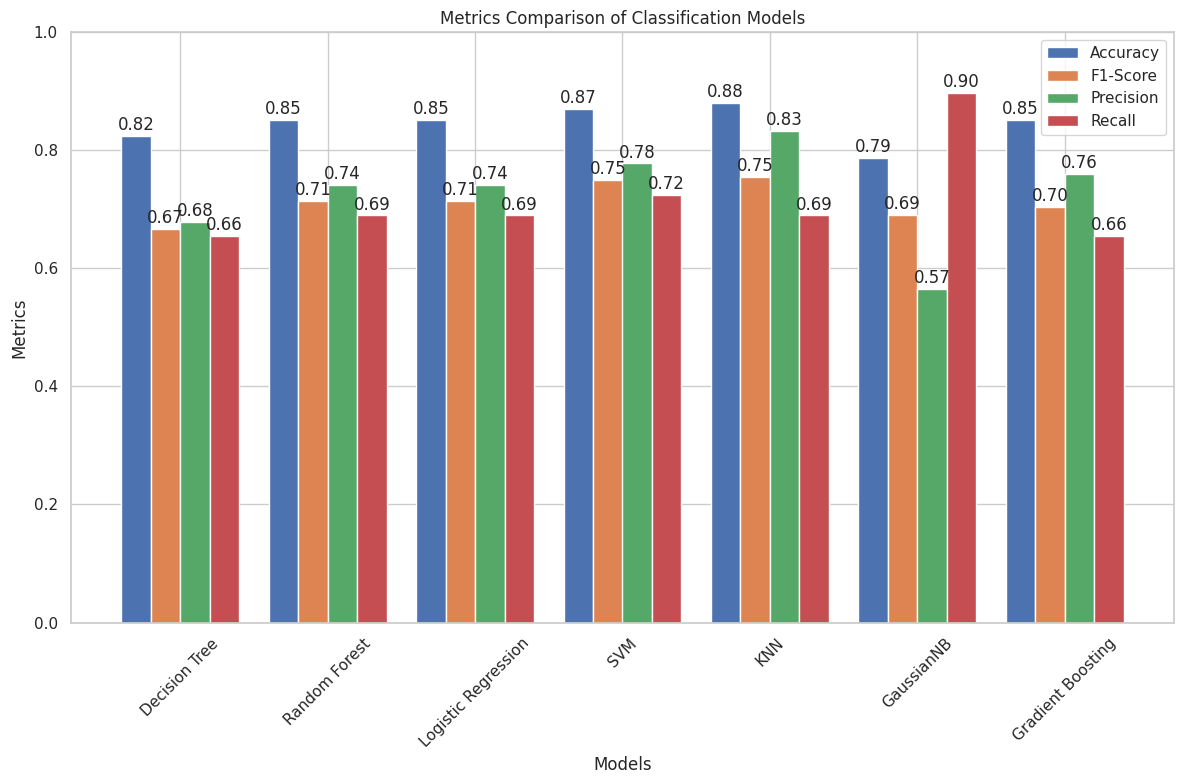

In [ ]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'GaussianNB', 'Gradient Boosting']
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']

# All metrics from the model extracted and stored in this table
values = np.array([
    [0.8241, 0.6667, 0.6786, 0.6552],
    [0.8519, 0.7143, 0.7407, 0.6897],
    [0.8519, 0.7143, 0.7407, 0.6897],
    [0.8704, 0.75, 0.7778, 0.7241],
    [0.8796, 0.7547, 0.8333, 0.6897],
    [0.787, 0.69, 0.5652, 0.8966],
    [0.8519, 0.7037, 0.76, 0.6552]
])

width = 0.2
x = np.arange(len(models))

plt.figure(figsize=(12, 8))  # Adjust the figure size here

for i in range(len(metrics)):
    plt.bar(x + i * width, values[:, i], width, label=metrics[i])
    for j, val in enumerate(values[:, i]):
        plt.text(x[j] + i * width, val + 0.01, f'{val:.2f}', ha='center')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Metrics Comparison of Classification Models')
plt.xticks(x + width * (len(metrics) - 1) / 2, models, rotation=45)
plt.legend()
plt.tight_layout()  # Ensures proper spacing of elements
plt.ylim(0, 1)
plt.show()

In [ ]:
df_metric = pd.DataFrame(values, columns=metrics, index=models)
display(df_metric)

,Accuracy,F1-Score,Precision,Recall
Decision Tree,0.8241,0.6667,0.6786,0.6552
Random Forest,0.8519,0.7143,0.7407,0.6897
Logistic Regression,0.8519,0.7143,0.7407,0.6897
SVM,0.8704,0.7500,0.7778,0.7241
KNN,0.8796,0.7547,0.8333,0.6897
GaussianNB,0.7870,0.6900,0.5652,0.8966
Gradient Boosting,0.8519,0.7037,0.7600,0.6552


The average accuracy recorded from the models was ~85%, with KNN having the highest, and GuassianNB having the lowest. This suggests that 85% of the 100 tests could be diagnosed correctly.

The performance of various classification models showed distinct outcomes in classifying the dataset. K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models exhibited exceptional accuracy, F1-score, and precision, indicating their adeptness in making accurate predictions. On the other hand, Gaussian Naive Bayes (GaussianNB) stood out for its notable recall performance, underscoring its capability to correctly identify positive cases. Random Forest, Logistic Regression, and Gradient Boosting exhibited well-balanced performance across multiple metrics, highlighting their versatility in handling different aspects of the classification task.

These variations in accuracy can be attributed to the fundamental characteristics and assumptions of each model combined with the specific attributes of the dataset. GaussianNB's reliance on assumptions, such as feature normality and independence, might lead to accuracy fluctuations when these assumptions do not hold. KNN's high accuracy of KNN suggests the presence of clear and well-defined decision boundaries within the feature space, whereas SVM's accuracy is likely boosted by its ability to determine optimal hyperplanes, effectively separating classes.

It is crucial to bear in mind that, while accuracy is significant, it does not provide a comprehensive evaluation of a model's performance. To gain a holistic understanding, metrics such as precision, recall, and F1-score should also be considered as they shed light on a model's handling of imbalanced classes and their capacity to minimize false positives or negatives.

Another important point to note is that, based on the Lasso regression,  not all parameters are relevant in predicting if a person has PCOS, such as weight, blood group, and BMI. On the other hand, parameters such as age and Follicle No number (L) and (R) are significant in determining whether a person has PCOS.

# Reference

- Johns Hopkins Medicine. (n.d.). Polycystic Ovary Syndrome (PCOS). Retrieved from https://www.hopkinsmedicine.org/health/conditions-and-diseases/polycystic-ovary-syndrome-pcos#:~:text=PCOS%20is%20a%20very%20common,%2C%20infertility%2C%20and%20weight%20gain. [Accessed July 6, 2023].

- Maple Leaf Meical Center. PCOS - Polycystic Ovary Syndrome. Retrieved from https://mapleleafmedical.com.au/blog/2019/9/21/pcos-polycystic-ovary-syndrome. [Accessed July 6, 2023].

# **Glossary**

**Continuous Variables**

Numerous continuous variables were incorporated to capture comprehensive insights into the dataset. These include:

| Variable                        | Description                                                                                      |
|-------------------------------|--------------------------------------------------------------------------------------------------|
| Age (yrs)                     | Age in years.                                                                                    |
| Weight (Kg)                   | Weight in kilograms.                                                                             |
| Height (Cm)                   | Height in centimeters.                                                                           |
| BMI (Body Mass Index)         | A measure of body fat based on weight and height.                                                |
| Blood Group                   | The ABO blood group system classification.                                                      |
| Pulse rate (bpm)              | Heart rate in beats per minute.                                                                 |
| RR (respiratory rate, breaths/min) | Respiratory rate in breaths per minute.                                                    |
| Hb (hemoglobin, g/dl)         | Hemoglobin level in grams per deciliter.                                                        |
| Cycle length (days)           | Menstrual cycle length in days.                                                                 |
| Marriage Status (Yrs)         | Duration of marriage in years.                                                                  |
| No. of abortions              | Number of abortions (terminated pregnancies).                                                   |
| I beta-HCG (mIU/mL)           | Beta-human chorionic gonadotropin level (a hormone produced during pregnancy) in milli-international units per milliliter. |
| II beta-HCG (mIU/mL)          | Another measurement of beta-HCG in milli-international units per milliliter.                     |
| FSH (Follicle-Stimulating Hormone, mIU/mL) | Hormone that plays a role in the regulation of the reproductive system, measured in milli-international units per milliliter. |
| LH (Luteinizing Hormone, mIU/mL) | Hormone that triggers ovulation and the release of eggs, measured in milli-international units per milliliter. |
| FSH/LH ratio                  | The ratio of FSH to LH levels.                                                                   |
| Hip (inch)                    | Hip measurement in inches.                                                                       |
| Waist (inch)                  | Waist measurement in inches.                                                                     |
| Waist:Hip Ratio               | The ratio of waist circumference to hip circumference.                                          |
| TSH (Thyroid-Stimulating Hormone, mIU/L) | Hormone that regulates thyroid function, measured in milli-international units per liter.     |
| AMH (Anti-Mullerian Hormone, ng/mL) | Hormone that reflects ovarian reserve, measured in nanograms per milliliter.                   |
| PRL (Prolactin, ng/mL)        | Hormone that stimulates milk production, measured in nanograms per milliliter.                  |
| Vit D3 (Vitamin D3, ng/mL)    | Blood level of vitamin D3 in nanograms per milliliter.                                          |
| PRG (Progesterone, ng/mL)     | Progesterone hormone level in nanograms per milliliter.                                          |
| RBS (Random Blood Sugar, mg/dl) | Random blood sugar level in milligrams per deciliter.                                         |
| BP Systolic (mmHg)            | Systolic blood pressure in millimeters of mercury.                                              |
| BP Diastolic (mmHg)           | Diastolic blood pressure in millimeters of mercury.                                             |
| Follicle No. (Left)           | Number of follicles on the left ovary.                                                          |
| Follicle No. (Right)          | Number of follicles on the right ovary.                                                         |
| Avg. F size (Left) (mm)       | Average follicle size on the left ovary in millimeters.                                          |
| Avg. F size (Right) (mm)      | Average follicle size on the right ovary in millimeters.                                         |
| Endometrium (mm)              | Thickness of the endometrial lining of the uterus in millimeters.                                |

**Categorical Variables**

The categorical variables, pivotal for discerning correlations and patterns, have been meticulously transformed into numerical representations. Noteworthy categorical variables include:

| Variable                | Description                                                                                         |
|-----------------------|-----------------------------------------------------------------------------------------------------|
| Pregnant (Y/N)        | Indicates whether the individual is currently pregnant (Yes or No).                              |
| Weight Gain (Y/N)     | Indicates whether the individual has experienced weight gain (Yes or No).                          |
| Hair Growth (Y/N)     | Indicates whether the individual has experienced excessive hair growth (Yes or No), which could be a symptom of PCOS. |
| Skin Darkening (Y/N)  | Indicates whether the individual has experienced darkening of the skin (Yes or No), which could be related to hormonal changes. |
| Hair Loss (Y/N)       | Indicates whether the individual has experienced hair loss (Yes or No), which could be related to hormonal imbalances. |
| Pimples (Y/N)         | Indicates whether the individual has experienced pimples or acne (Yes or No), which could be associated with PCOS. |
| Fast Food (Y/N)       | Indicates whether the individual consumes fast food regularly (Yes or No).                          |
| Regular Exercise (Y/N)| Indicates whether the individual engages in regular exercise (Yes or No).                          |


